In [1]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
# import jupyter_black

# jupyter_black.load()

# Importing data

In [2]:
df=pd.read_excel("Flourishing_248_HD - Copy.xlsx")
df.head()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33


## Checking basic info, missing values , shape and data types

In [3]:
df.shape

(248, 11)

In [4]:
df1=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [6]:
di_sex = {2: "female", 1: "male"}
df.replace({"sex": di_sex},inplace=True)

di_famstatus = {2: "Separate / Divorced", 1: "Single",3:"Couple"}
df.replace({"famstatus": di_famstatus},inplace=True)

di_education = {2: "completed HS", 1: "not completed HS", 3:"upto 2Y after HS", 4:"upto 3Y after HS", 5:"upto 4Y after HS",6:"upto 5Y after HS" }
df.replace({"education": di_education},inplace=True)

di_pro = {2: "Moderately Mentally Healthy", 1: "Languishing",3:"Flourishing"}
df.replace({"pro_cat": di_pro},inplace=True)

di_priv = {2: "Moderately Mentally Healthy", 1: "Languishing",3:"Flourishing"}
df.replace({"priv_cat": di_priv},inplace=True)
# di_education = {2: "female", 1: "male"}
# df.replace({"sex": di_sex})

conditions = [(df['positivity'] < 1), (df['positivity'] >= 1) & (df['positivity'] < 2),
    (df['positivity'] >= 2) & (df['positivity'] < 3), (df['positivity'] >= 3)]

categories = ["depressed", "languishing", "moderately emotionally healthy", "emotionally flourishing"]
df["pos_cat"] = np.select(conditions, categories)

df.head()



,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat
0,344,72,upto 5Y after HS,female,Separate / Divorced,Flourishing,82,Flourishing,83,4.142857,44,emotionally flourishing
1,317,45,upto 5Y after HS,female,Separate / Divorced,Flourishing,81,Flourishing,83,4.000000,44,emotionally flourishing
2,444,43,upto 4Y after HS,male,Single,Flourishing,79,Flourishing,78,5.000000,47,emotionally flourishing
3,270,60,completed HS,female,Couple,Flourishing,79,Flourishing,82,4.666667,42,emotionally flourishing
4,52,49,completed HS,female,Separate / Divorced,Flourishing,77,Flourishing,73,2.285714,33,moderately emotionally healthy


# Analysis

## Univariate

In [7]:
numerical_cols=["age","pro_quant","priv_quant","flow"]
categorical_cols=["education","sex","famstatus","pro_cat","priv_cat","pos_cat"]


### Categorical

In [8]:
def visualize_categorical_data(data, column_name):
    # Create summary table
    summary = pd.DataFrame(data[column_name].value_counts(normalize=True))
    summary.columns = ['Frequency']
    summary['Frequency'] = summary['Frequency'] * 100
    summary = summary.reset_index()
    summary.columns = ['Category', 'Frequency']
    summary = summary.sort_values('Frequency', ascending=False)

    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    # Generate a color palette
    colors = plt.cm.Set3(np.linspace(0, 1, len(summary)))

    # Bar plot
    sns.barplot(x='Category', y='Frequency', data=summary, ax=ax1, palette=colors)
    ax1.set_xlabel(column_name)
    ax1.set_ylabel("Frequency (%)")
    ax1.set_title(f"Bar Chart for {column_name}")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # Pie chart
    wedges, texts, autotexts = ax2.pie(summary['Frequency'], 
                                       labels=summary['Category'], 
                                       autopct='%1.1f%%', 
                                       colors=colors,
                                       startangle=90)
    ax2.set_title(f"Pie Chart for {column_name}")

    # Move the legend outside the pie chart
    ax2.legend(wedges, summary['Category'],
               title="Categories",
               loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

    return summary

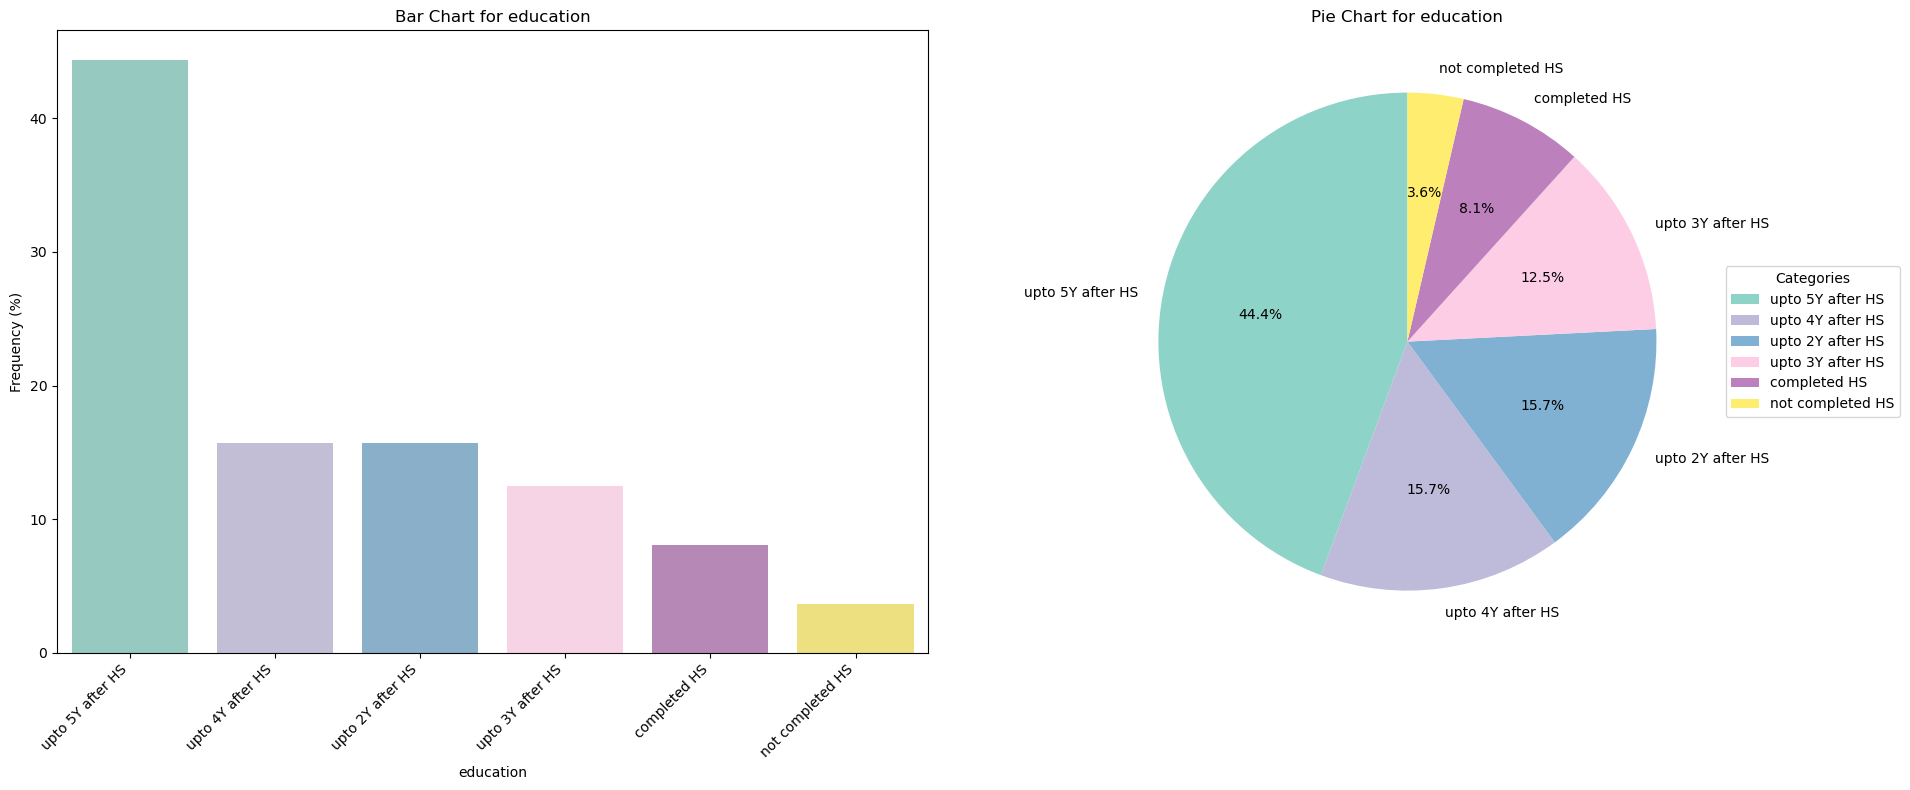

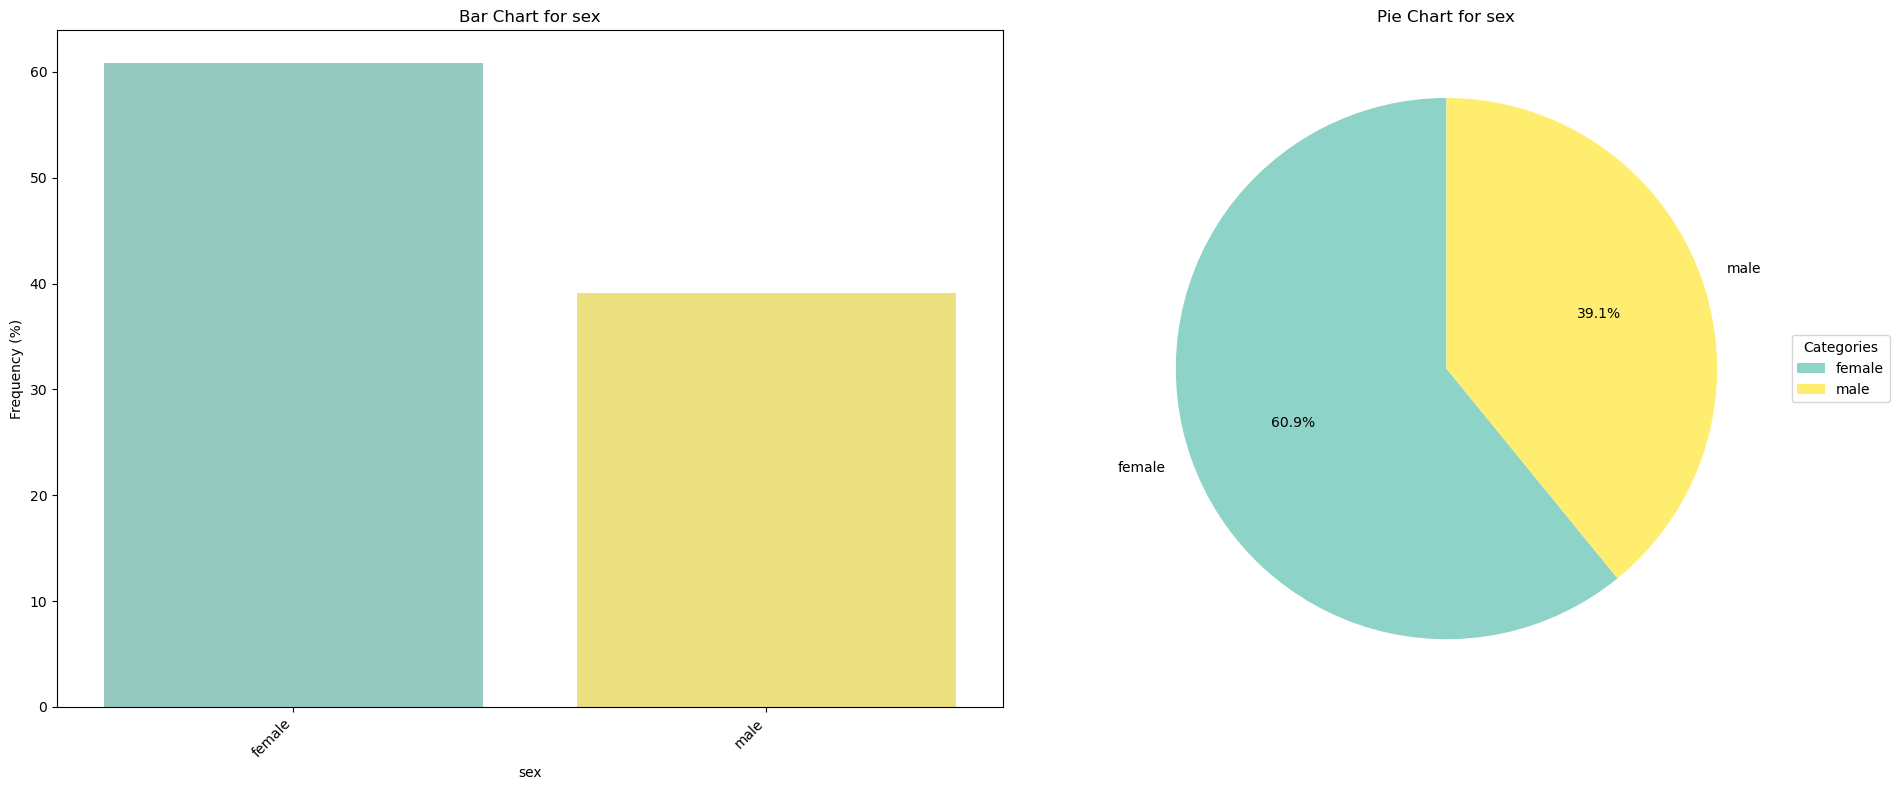

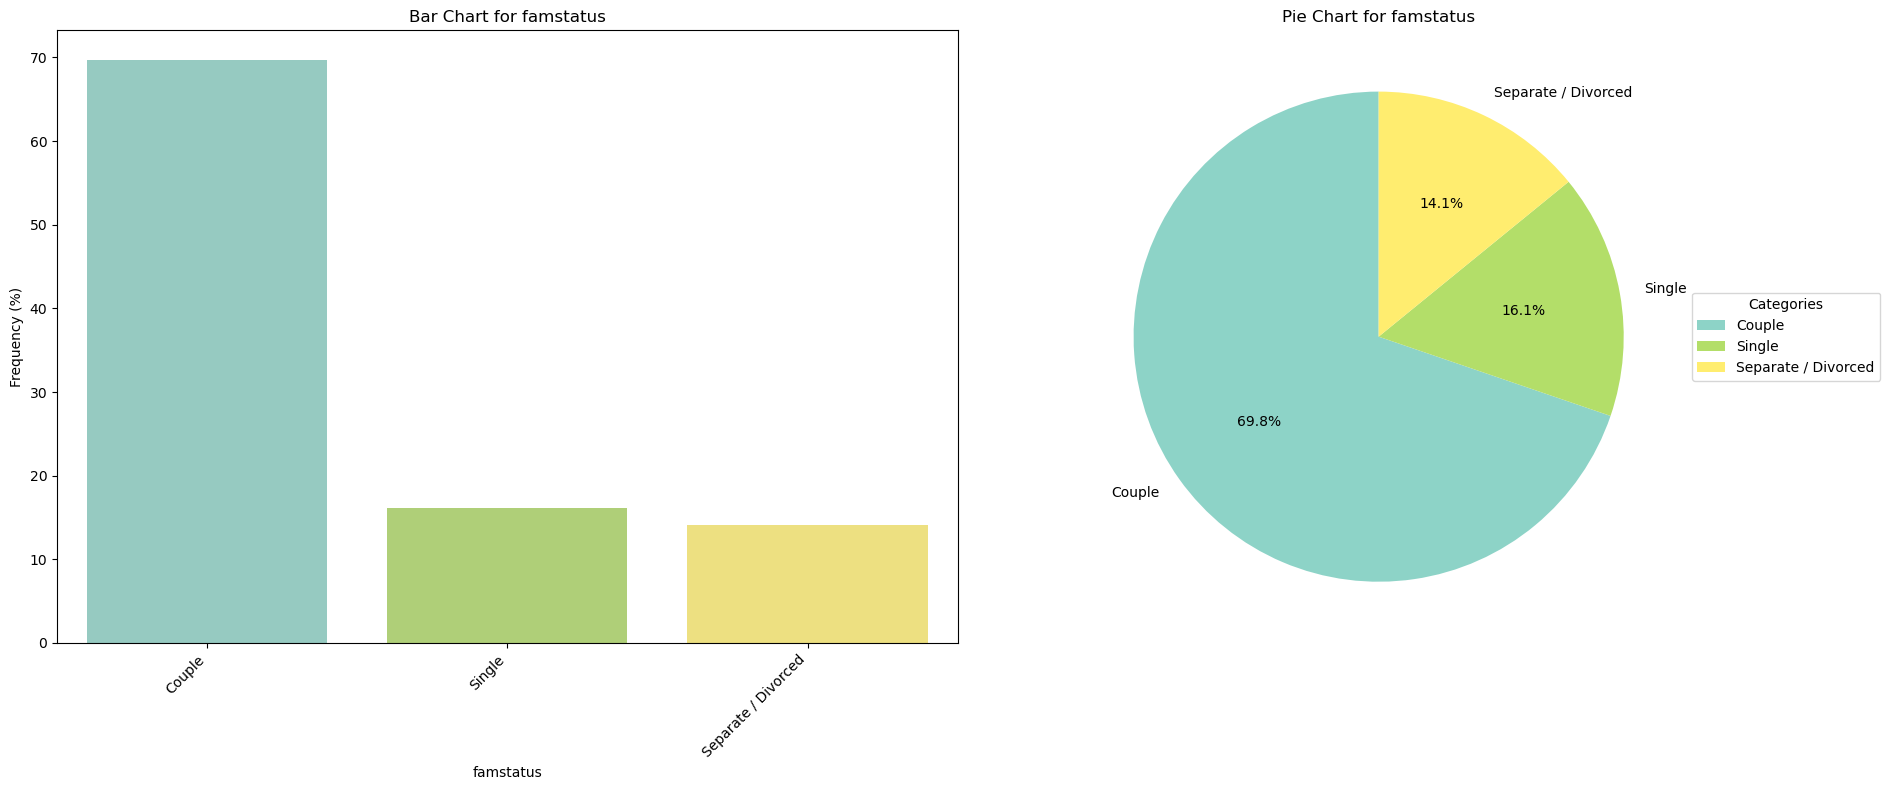

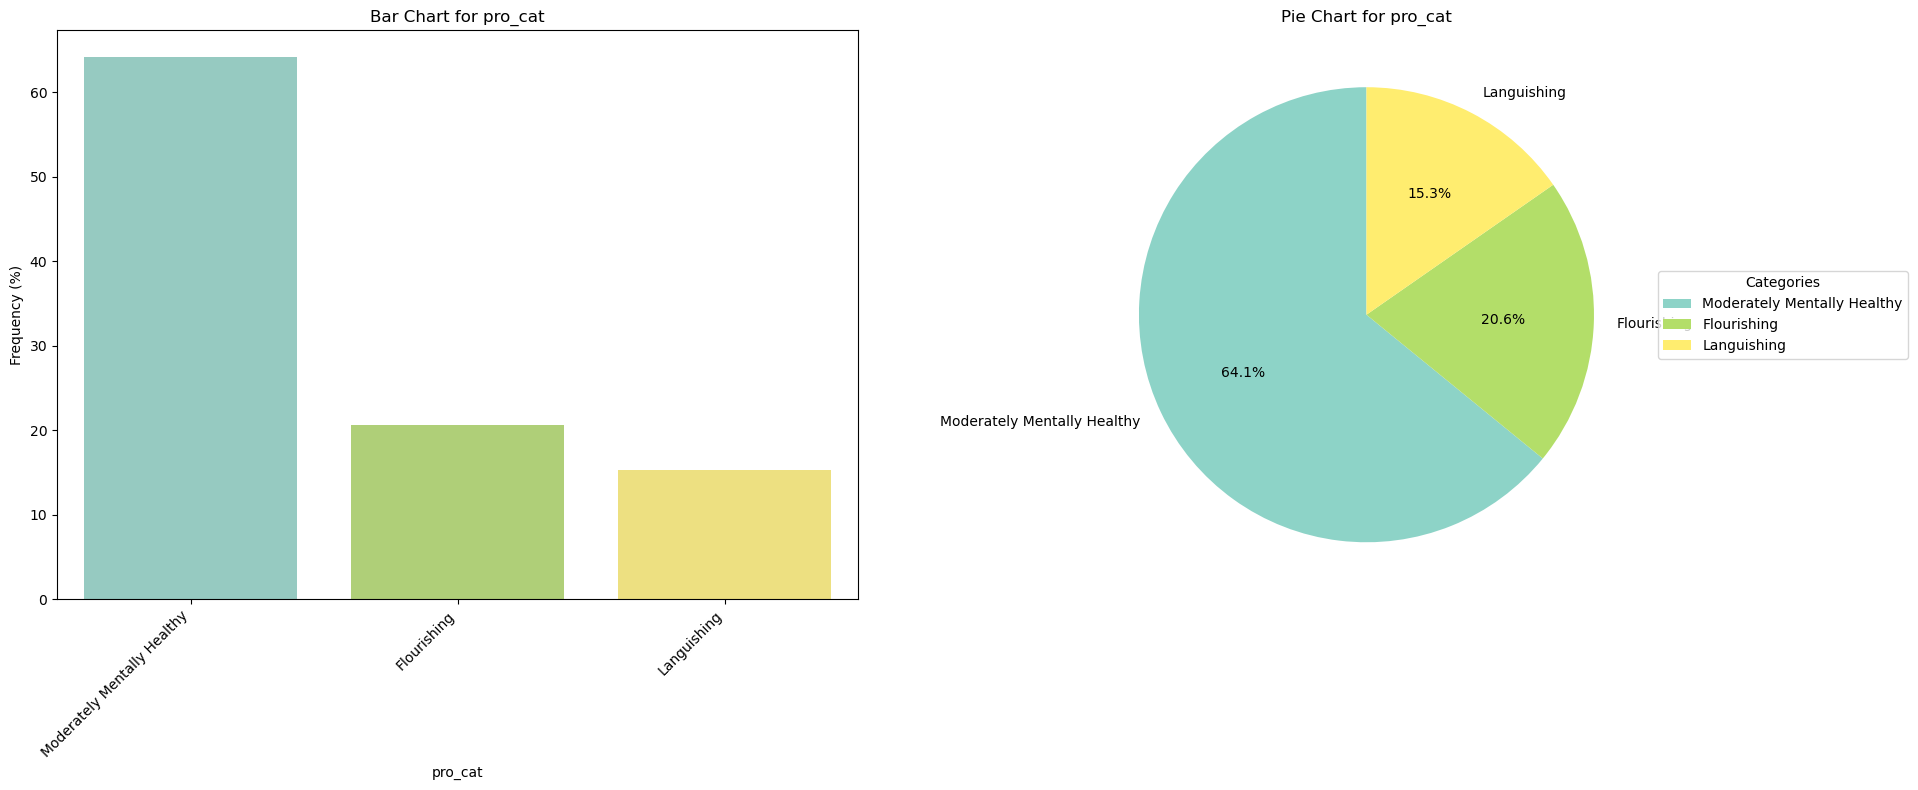

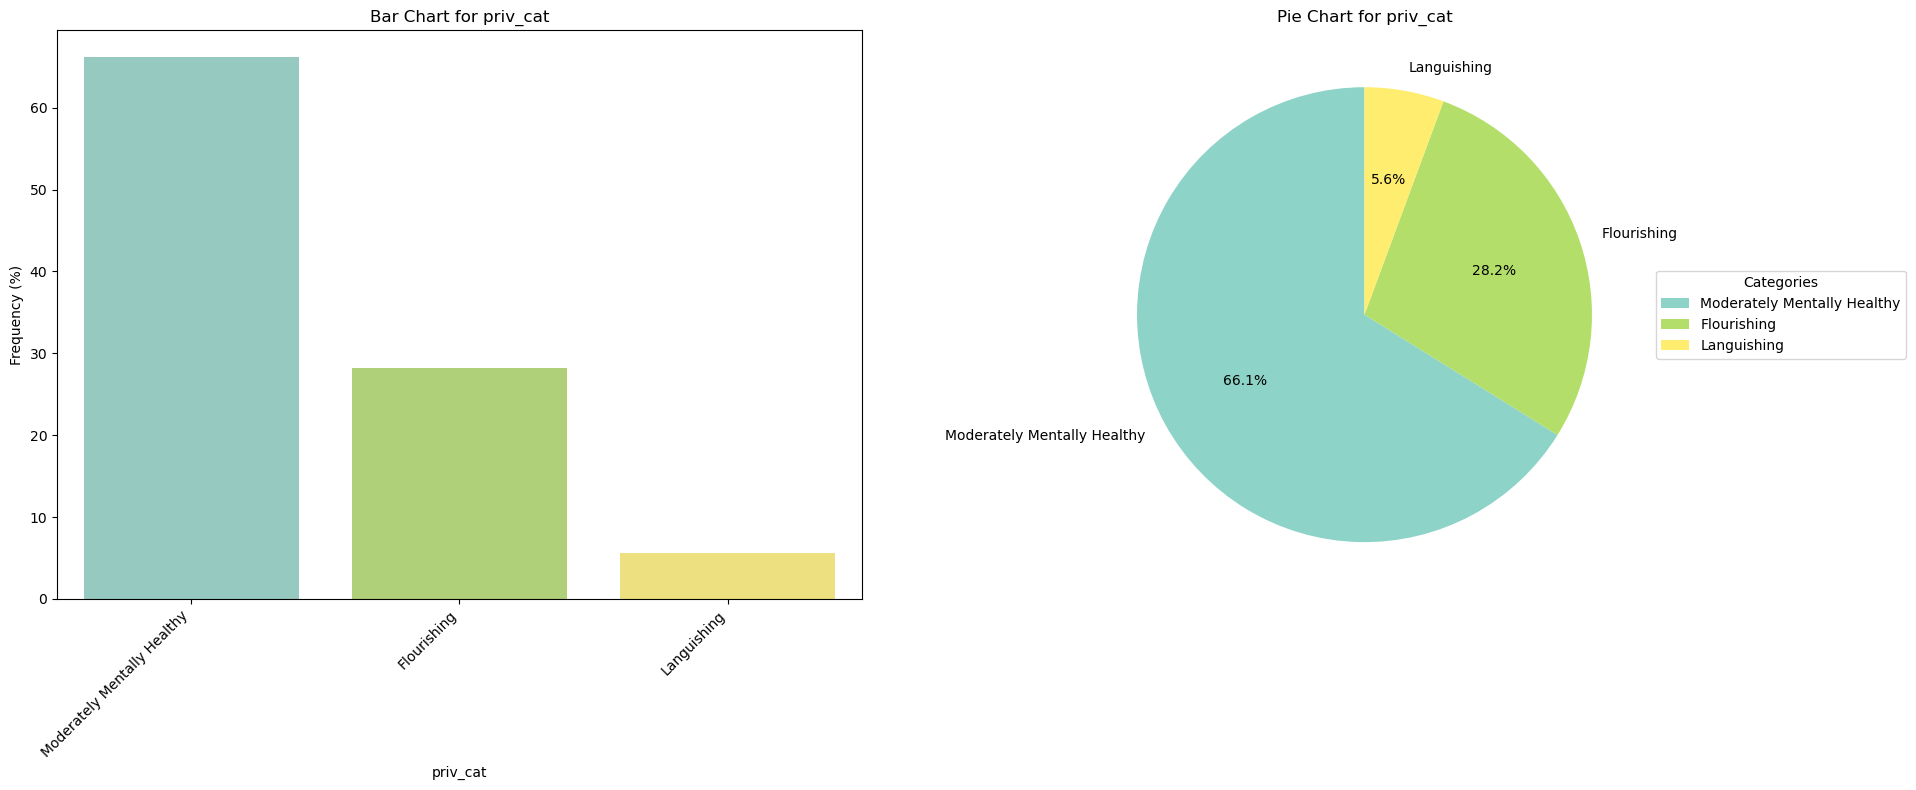

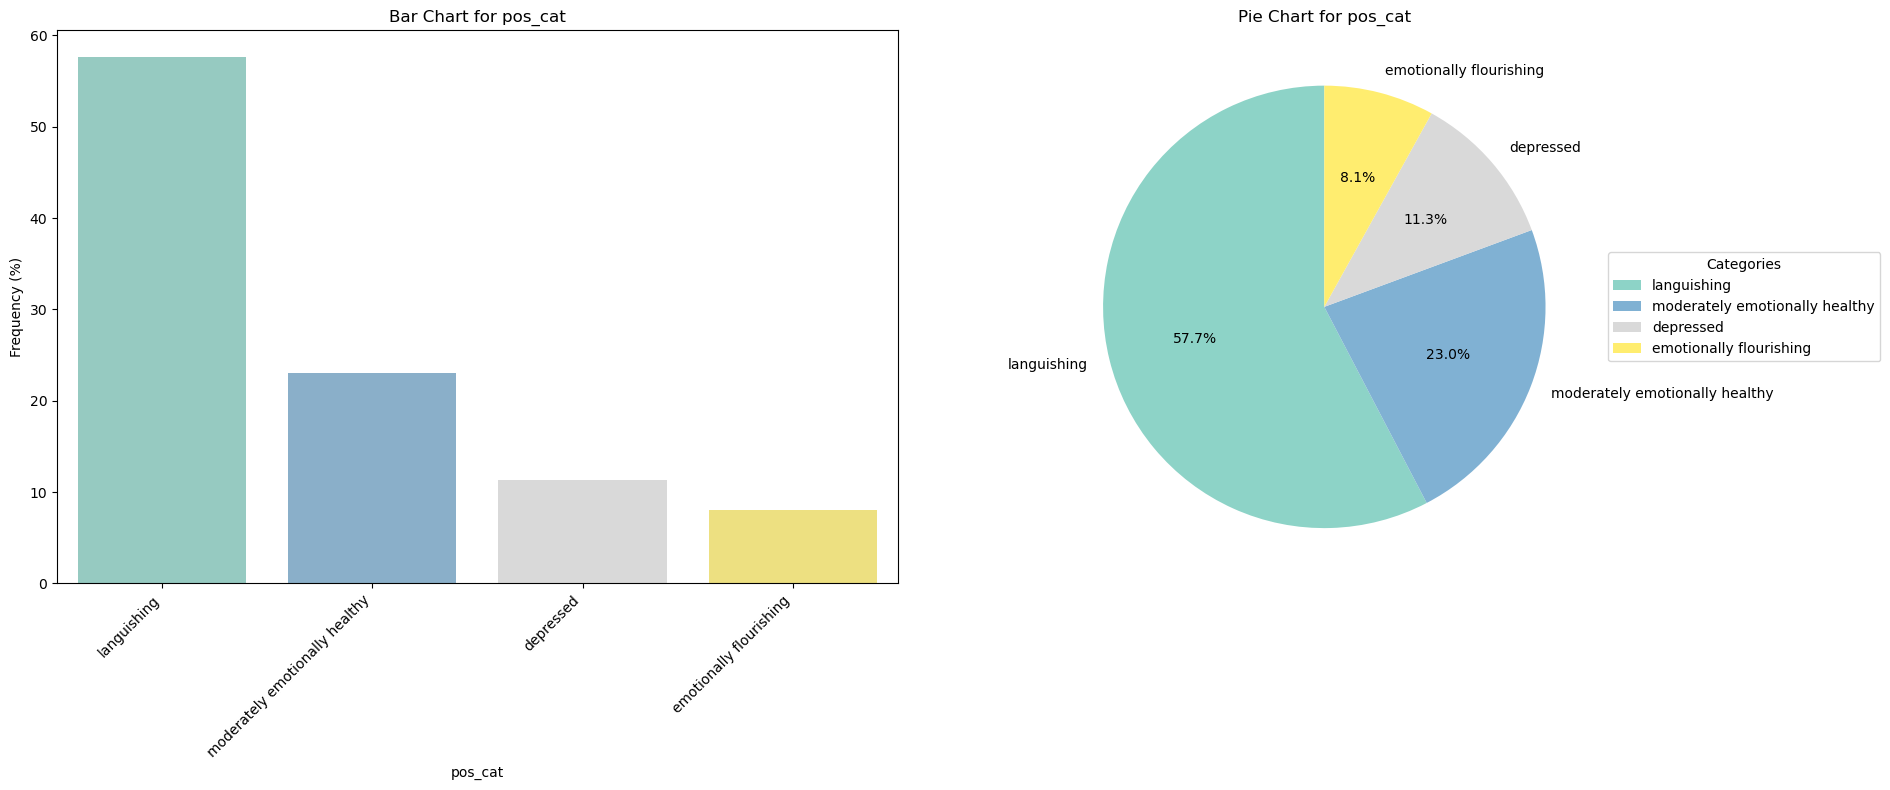

In [9]:
for i in categorical_cols:
    
    visualize_categorical_data(df,i)
    


### Continous

In [10]:
def plot_histogram_boxplot(data, column_name, bins=5):
    # Ensure data is a pandas Series
    if isinstance(data, pd.DataFrame):
        data = data[column_name]
    elif not isinstance(data, pd.Series):
        data = pd.Series(data)
    
    # Set up the plot
    # sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    
    # Histogram
    sns.histplot(data=data, bins=bins, ax=ax1)
    
    # Formatting for histogram
    ax1.set_xlabel(column_name)
    ax1.set_ylabel("Count")
    ax1.set_title(f"Histogram for {column_name}")
    
    # Vertical Boxplot
    sns.boxplot(y=data, ax=ax2, orient="v")
    ax2.set_title(f"Box plot for {column_name}")
    ax2.set_ylabel(column_name)
    
    plt.tight_layout()
    plt.show()

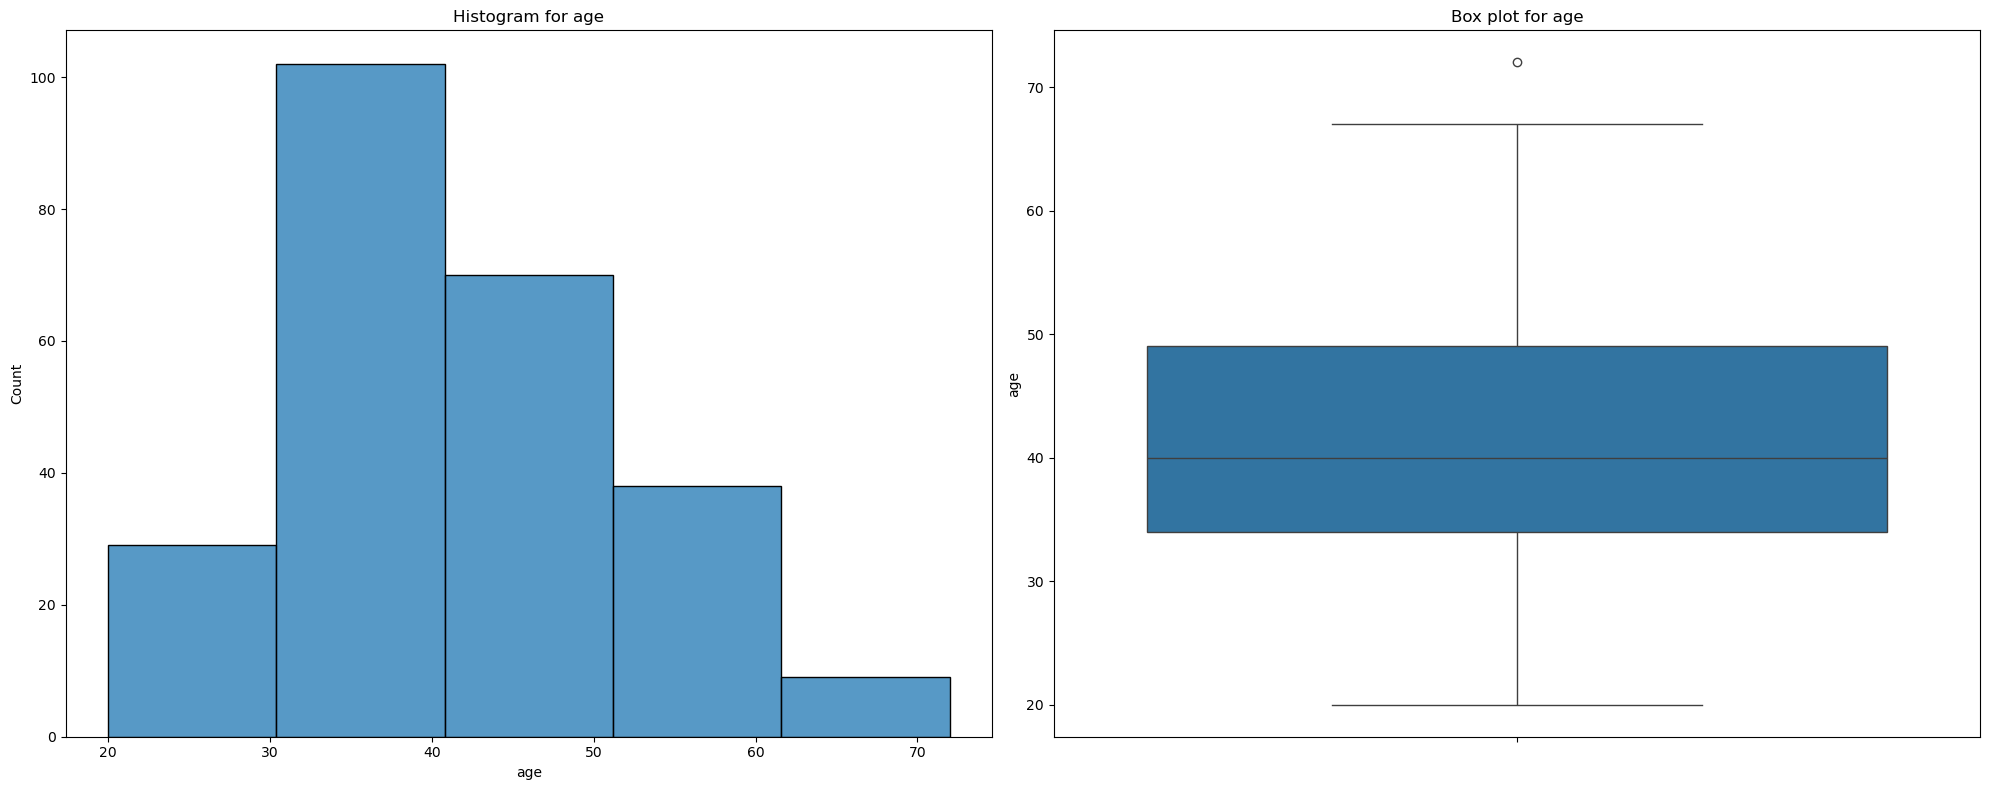

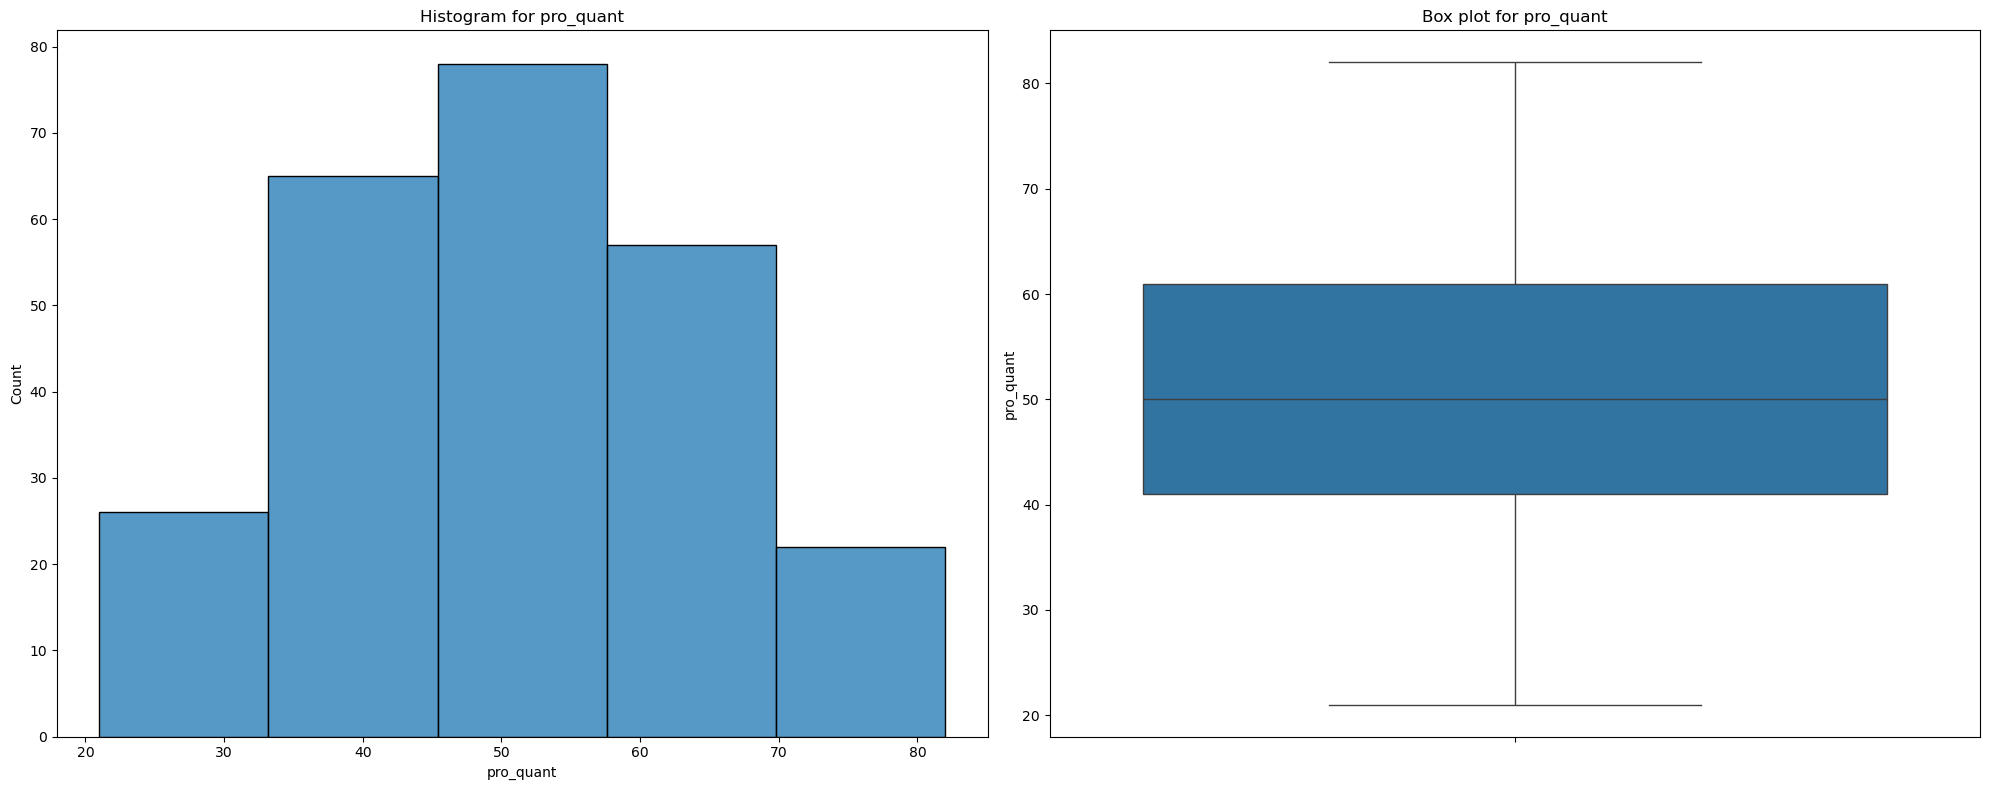

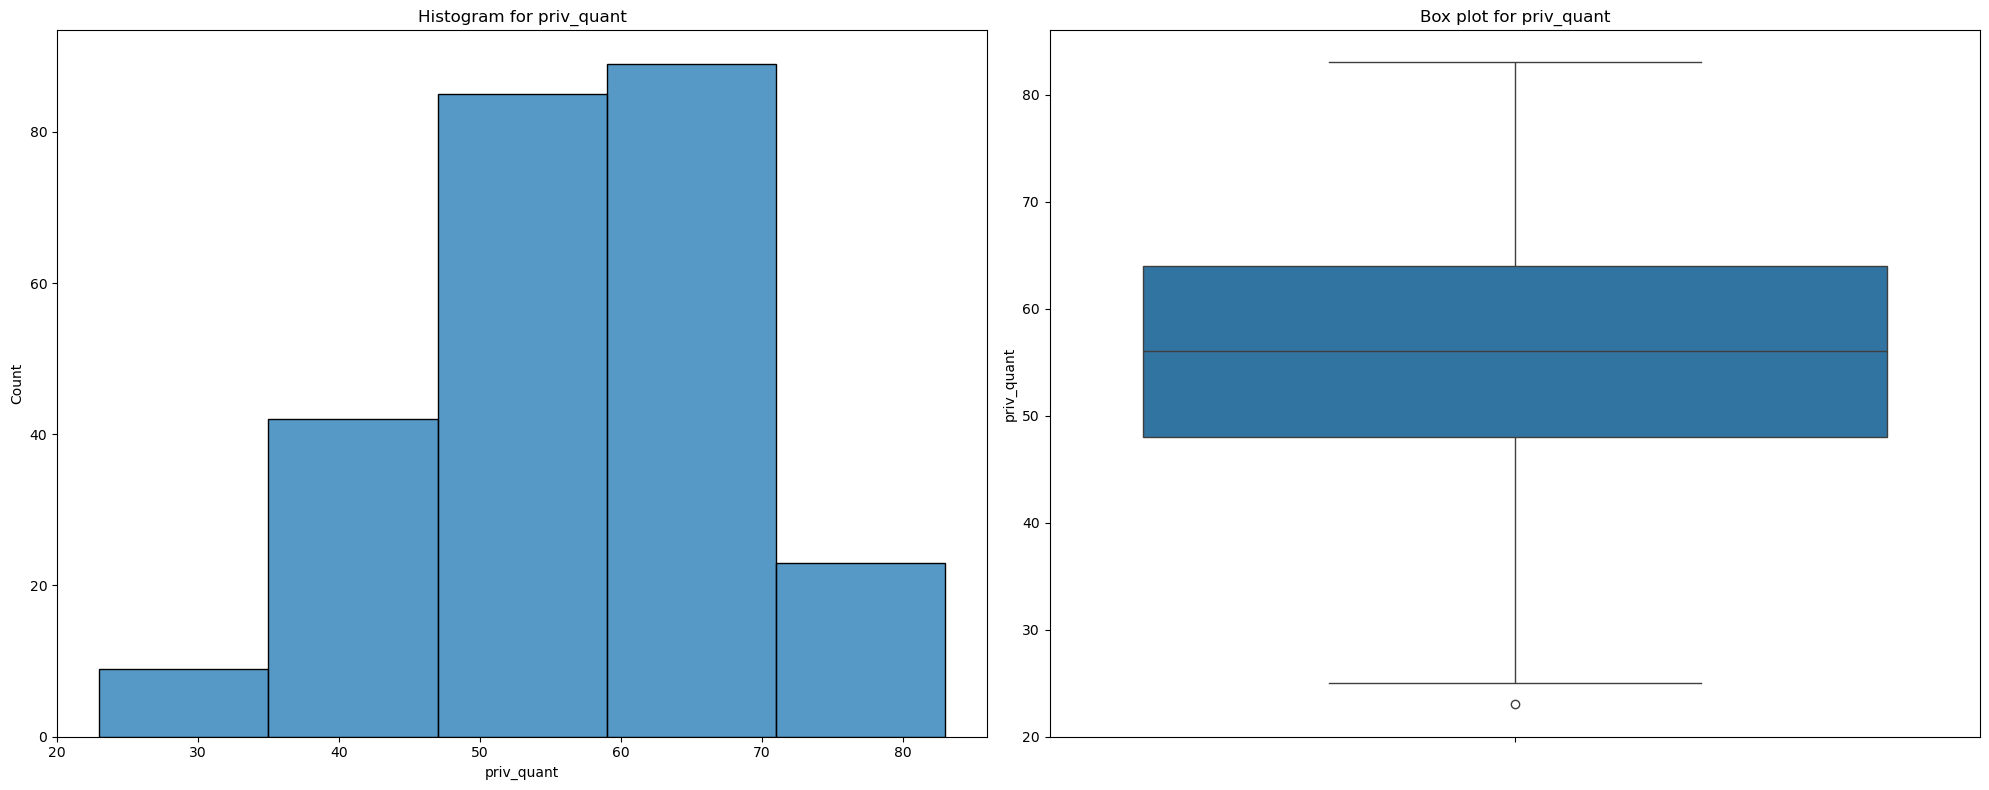

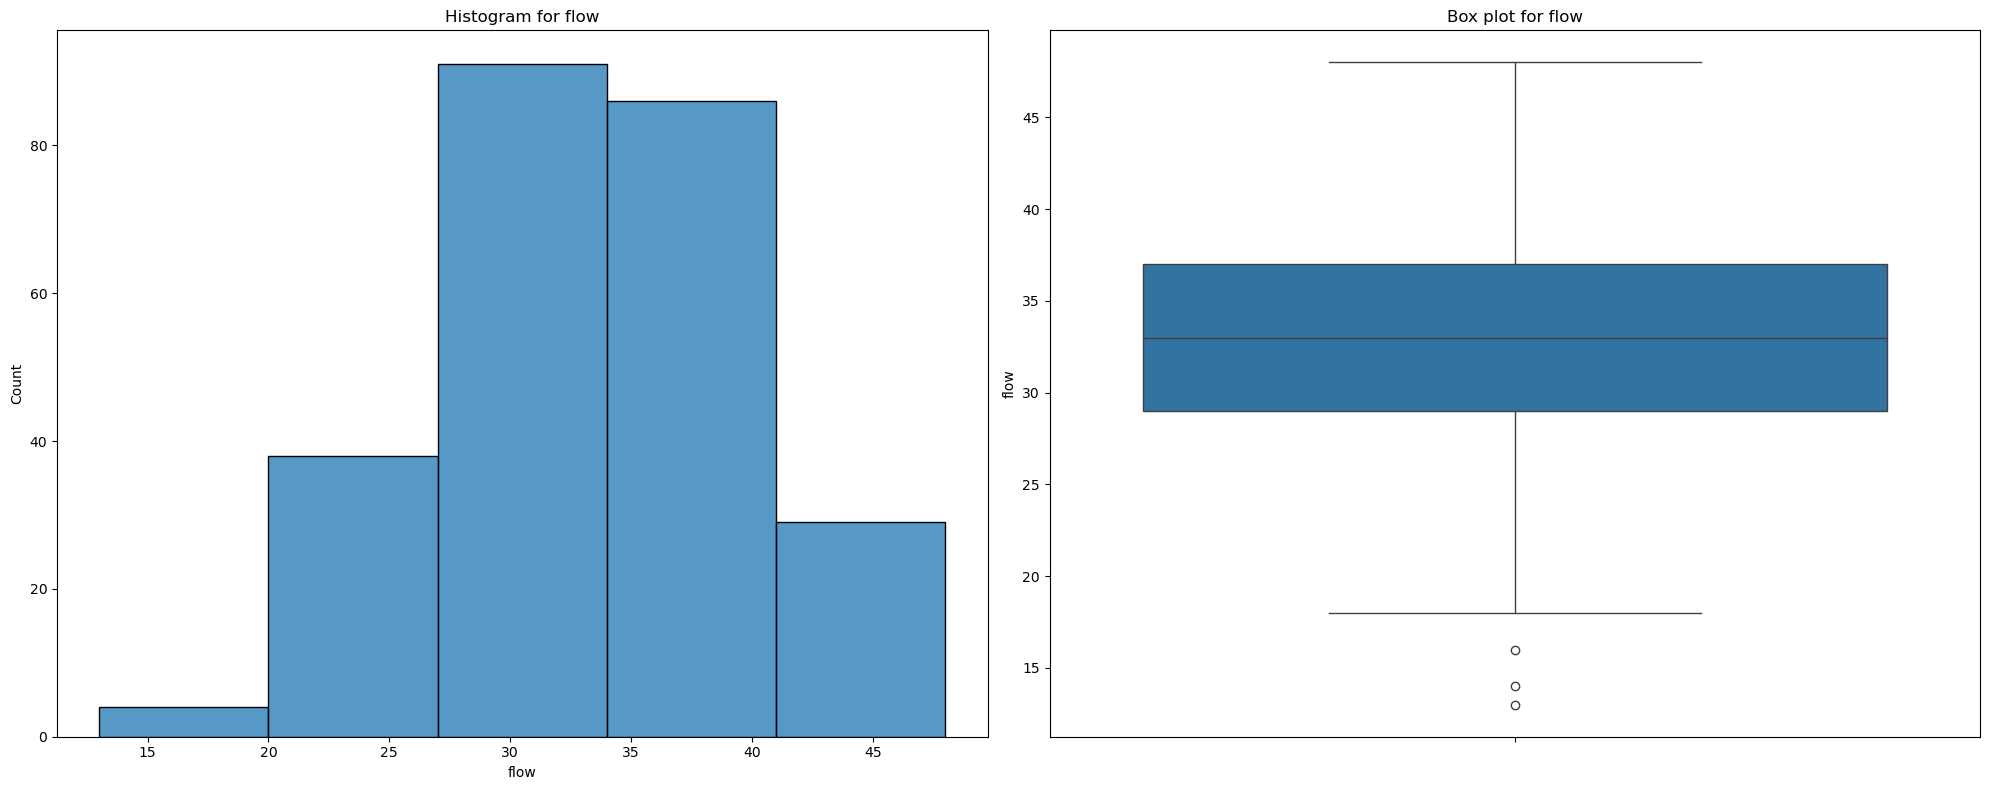

In [11]:
for i in numerical_cols:
    
    plot_histogram_boxplot(df, i)

## Bivariate

### Categorical

In [12]:
numerical_cols

['age', 'pro_quant', 'priv_quant', 'flow']

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

siginicant_list = []
non_significant_list = []
def bivariate_Categorical(x,y,a,b):
    contingency_table = pd.crosstab(df[x], df[y])
    print("Contingency Table:")
    print(contingency_table)
    

    chi2, p_value, dof, expected = chi2_contingency(contingency_table,correction=False)
    
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    
   
    alpha = 0.05  # Common significance level
    
    if p_value <= alpha:
        print(f"\nThe p-value ({p_value:.4f}) is less than or equal to the significance level ({alpha}).")
        print("We reject the null hypothesis.")
        print(f"There is a significant relationship between {x} and {y}.")
        a.append((contingency_table,x,y,p_value))
    else:
        print(f"\nThe p-value ({p_value:.4f}) is greater than the significance level ({alpha}).")
        print("We fail to reject the null hypothesis.")
        print(f"There is not enough evidence to conclude a significant relationship between {x} and {y}.")
        b.append((contingency_table,x,y,p_value))
    
    # Optional: Calculate and display Cramer's V for effect size
    def cramers_v(contingency_table):
        chi2 = chi2_contingency(contingency_table)[0]
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        return np.sqrt(chi2 / (n * min_dim))
    
    cramer_v = cramers_v(contingency_table)
    print(f"\nCramer's V: {cramer_v:.4f}")



In [14]:
numerical_cols

['age', 'pro_quant', 'priv_quant', 'flow']

In [15]:


for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):  # Corrected the range
        bivariate_Categorical(categorical_cols[i], categorical_cols[j], siginicant_list, non_significant_list)


Contingency Table:
sex               female  male
education                     
completed HS          12     8
not completed HS       5     4
upto 2Y after HS      23    16
upto 3Y after HS      22     9
upto 4Y after HS      22    17
upto 5Y after HS      67    43

Chi-square statistic: 1.8250
p-value: 0.8728
Degrees of freedom: 5

The p-value (0.8728) is greater than the significance level (0.05).
We fail to reject the null hypothesis.
There is not enough evidence to conclude a significant relationship between education and sex.

Cramer's V: 0.0858
Contingency Table:
famstatus         Couple  Separate / Divorced  Single
education                                            
completed HS          10                    4       6
not completed HS       7                    1       1
upto 2Y after HS      27                    7       5
upto 3Y after HS      18                    7       6
upto 4Y after HS      27                    6       6
upto 5Y after HS      84                   10

In [16]:
for i in siginicant_list:
    print(f"the variables {i[1]} and {i[2]} have significant relationship between them because they have pvalue {i[3]:.4f}")

the variables education and pos_cat have significant relationship between them because they have pvalue 0.0298
the variables sex and famstatus have significant relationship between them because they have pvalue 0.0161
the variables famstatus and priv_cat have significant relationship between them because they have pvalue 0.0251
the variables pro_cat and priv_cat have significant relationship between them because they have pvalue 0.0000
the variables pro_cat and pos_cat have significant relationship between them because they have pvalue 0.0000
the variables priv_cat and pos_cat have significant relationship between them because they have pvalue 0.0000


In [17]:
for i in non_significant_list:
    print(f"the variables {i[1]} and {i[2]} have no significant relationship between them  because they have pvalue {i[3]:.4f}")

the variables education and sex have no significant relationship between them  because they have pvalue 0.8728
the variables education and famstatus have no significant relationship between them  because they have pvalue 0.4217
the variables education and pro_cat have no significant relationship between them  because they have pvalue 0.2886
the variables education and priv_cat have no significant relationship between them  because they have pvalue 0.3594
the variables sex and pro_cat have no significant relationship between them  because they have pvalue 0.7920
the variables sex and priv_cat have no significant relationship between them  because they have pvalue 0.5747
the variables sex and pos_cat have no significant relationship between them  because they have pvalue 0.1790
the variables famstatus and pro_cat have no significant relationship between them  because they have pvalue 0.5592
the variables famstatus and pos_cat have no significant relationship between them  because they ha

In [18]:
siginicant_list[0][0]

pos_cat,depressed,emotionally flourishing,languishing,moderately emotionally healthy
education,,,,
completed HS,2,1,8,9
not completed HS,1,1,4,3
upto 2Y after HS,4,1,24,10
upto 3Y after HS,1,2,14,14
upto 4Y after HS,3,5,24,7
upto 5Y after HS,17,10,69,14


In [19]:
dfs=siginicant_list[0][0].reset_index()
dfs

pos_cat,education,depressed,emotionally flourishing,languishing,moderately emotionally healthy
0,completed HS,2,1,8,9
1,not completed HS,1,1,4,3
2,upto 2Y after HS,4,1,24,10
3,upto 3Y after HS,1,2,14,14
4,upto 4Y after HS,3,5,24,7
5,upto 5Y after HS,17,10,69,14


In [20]:
for i,value in enumerate(siginicant_list):
    print(i,value[1])

0 education
1 sex
2 famstatus
3 pro_cat
4 pro_cat
5 priv_cat


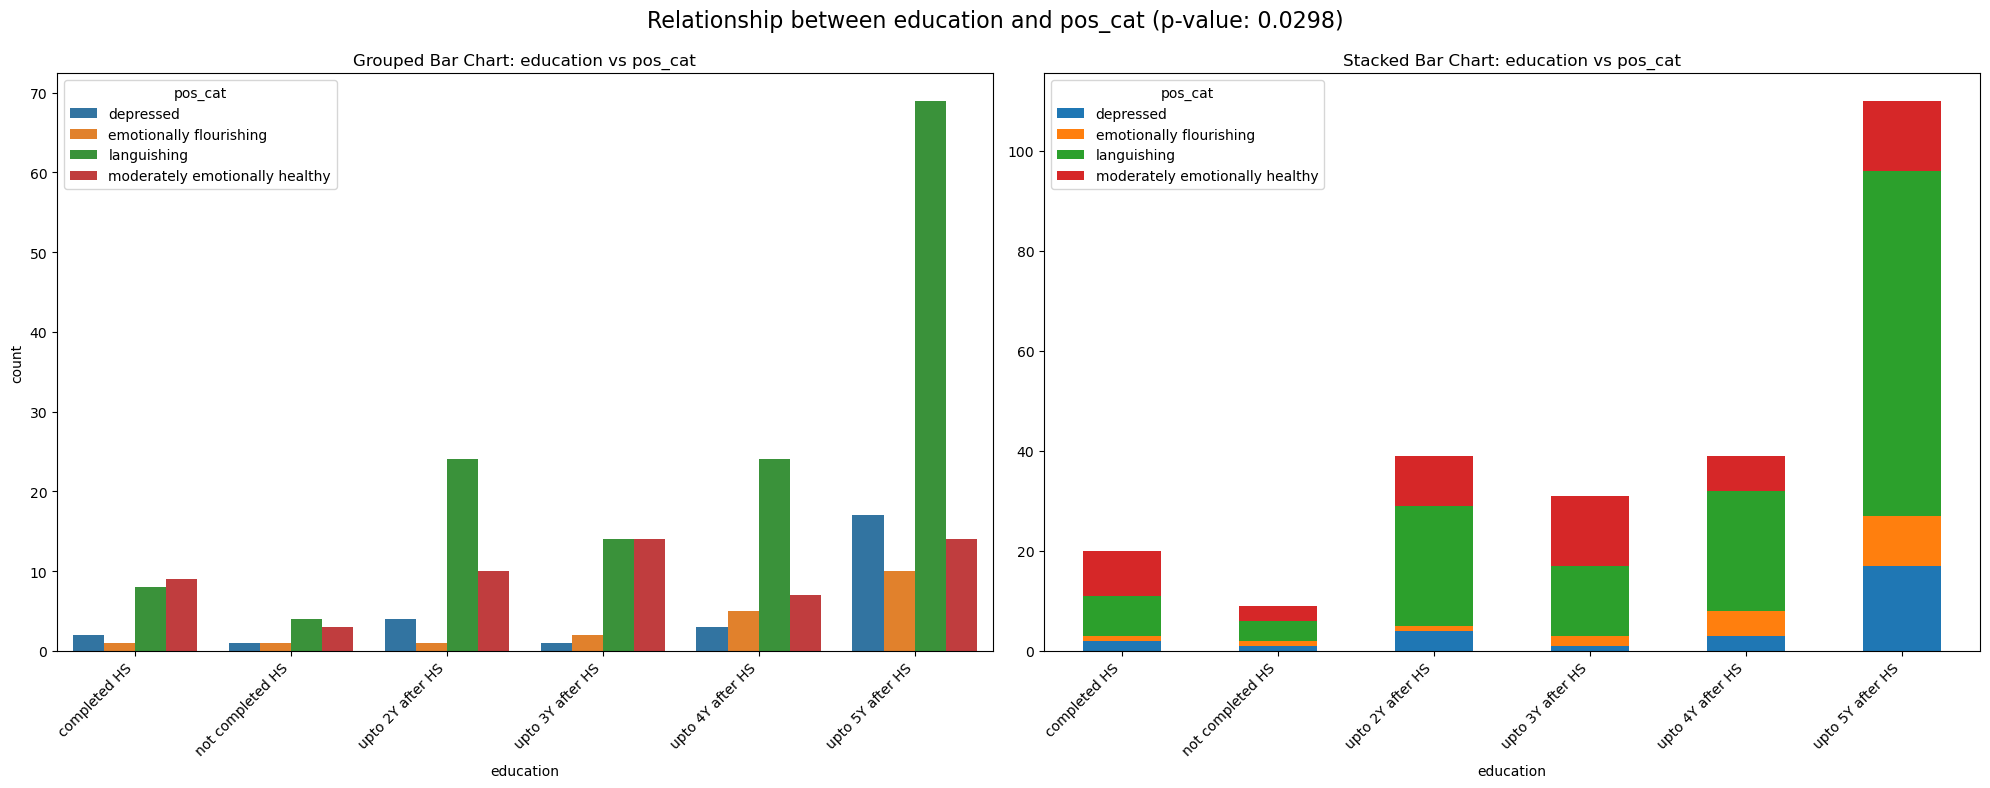

Completed plot 1 of 6


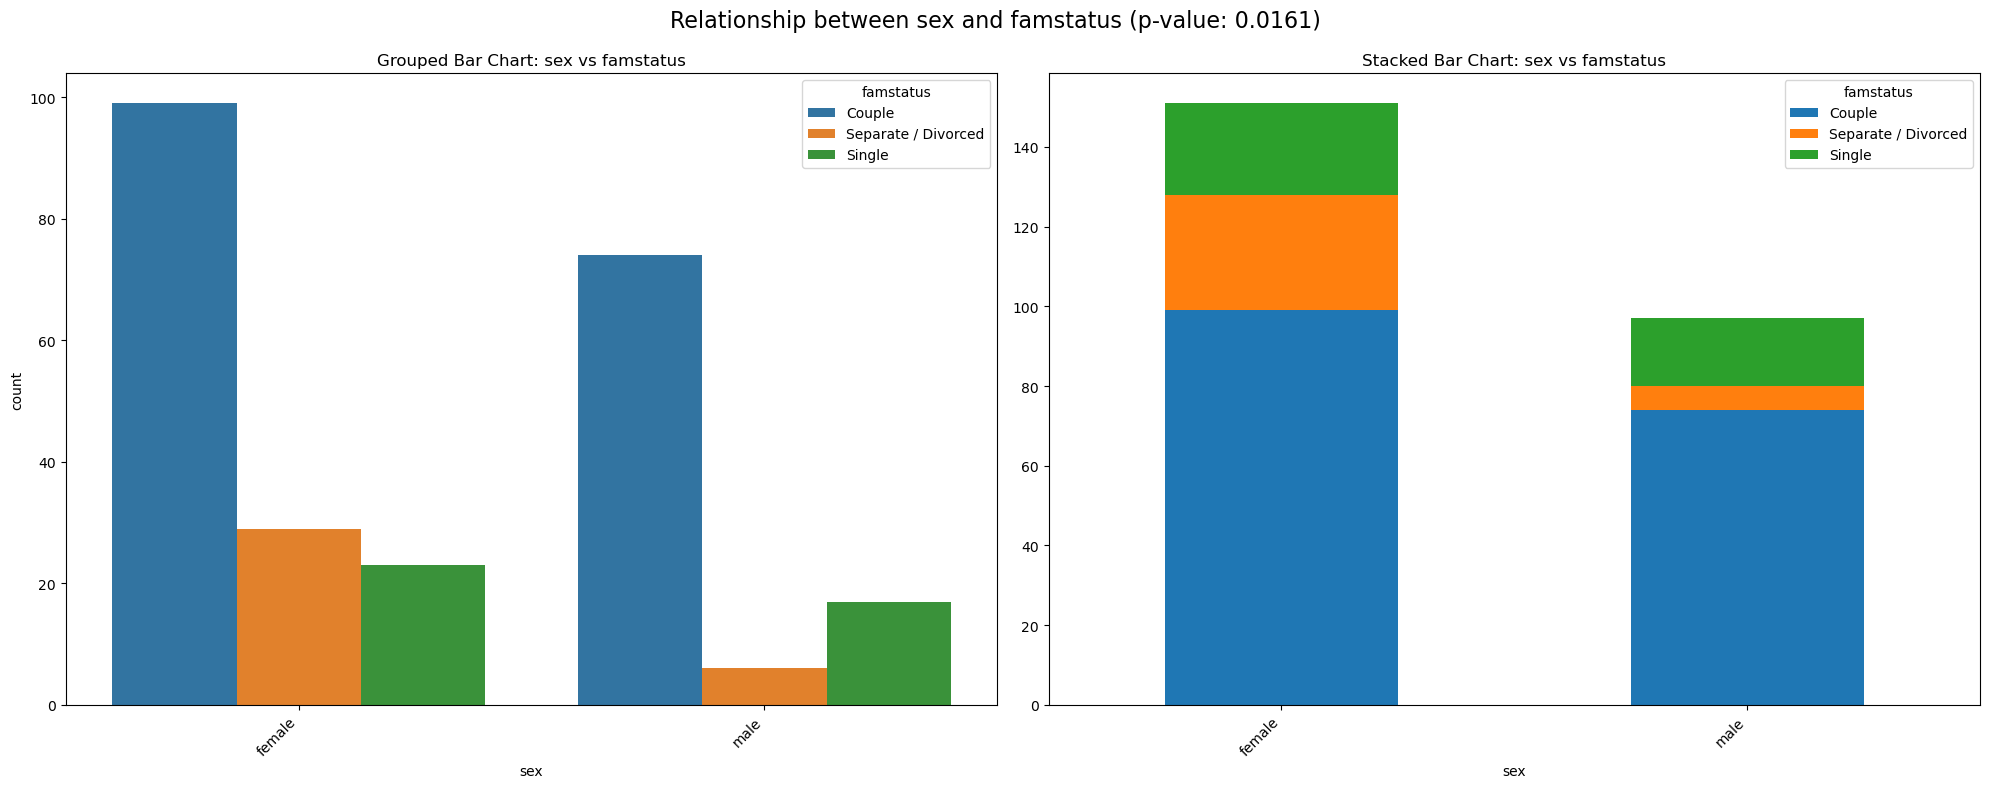

Completed plot 2 of 6


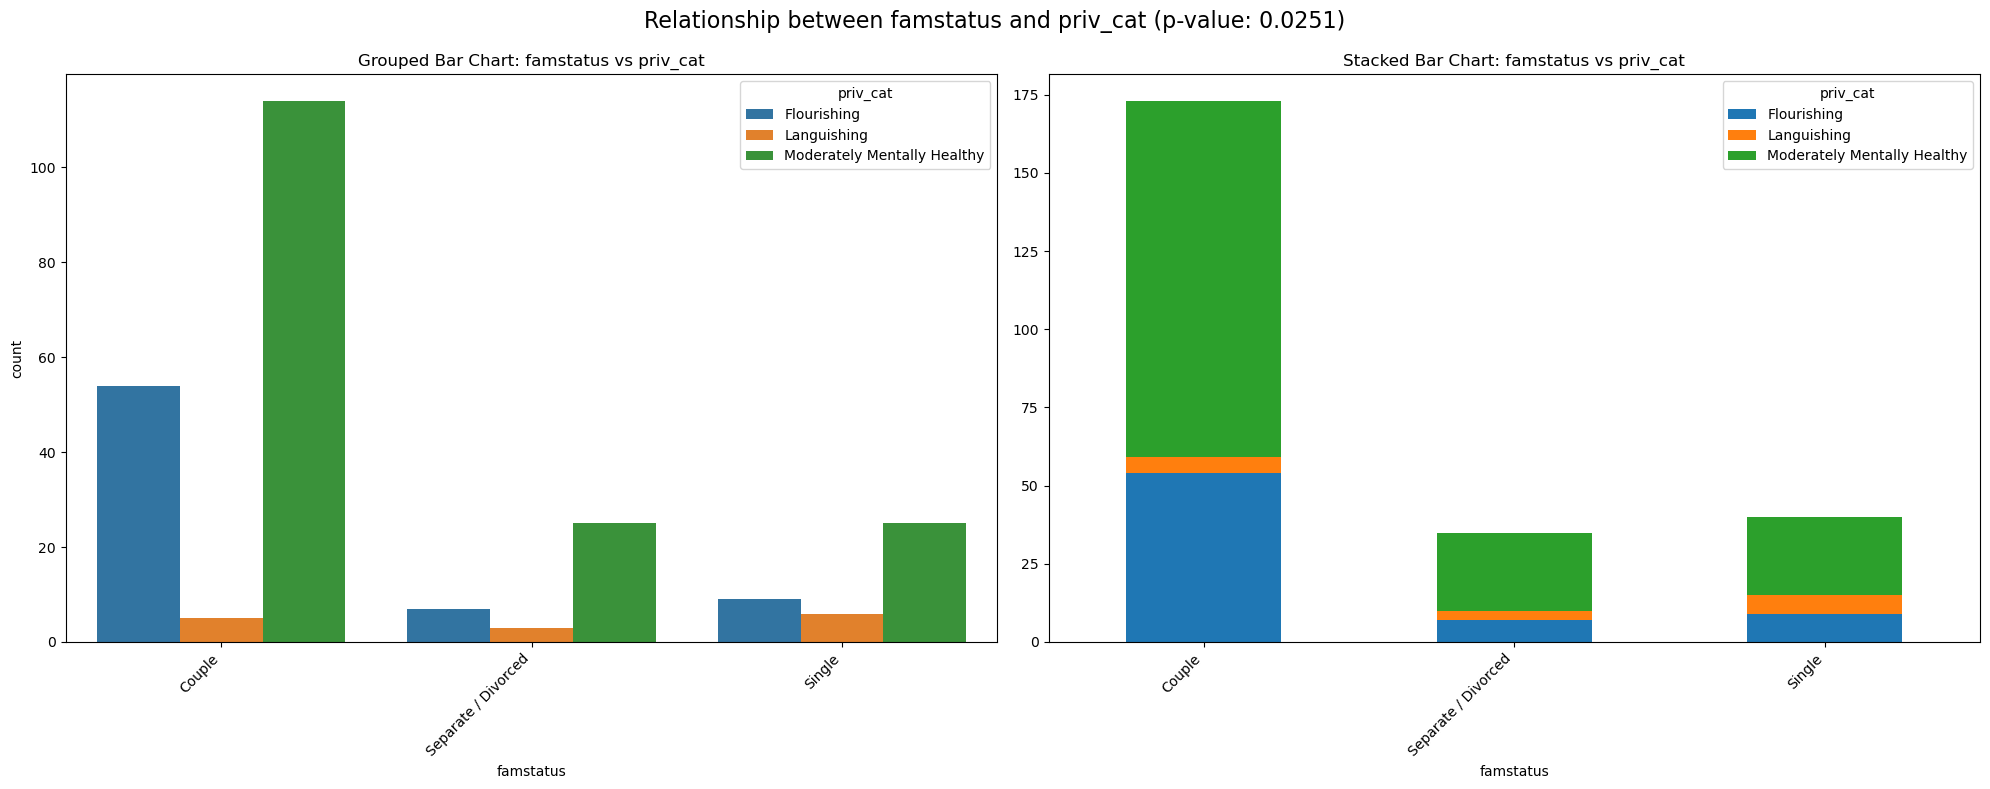

Completed plot 3 of 6


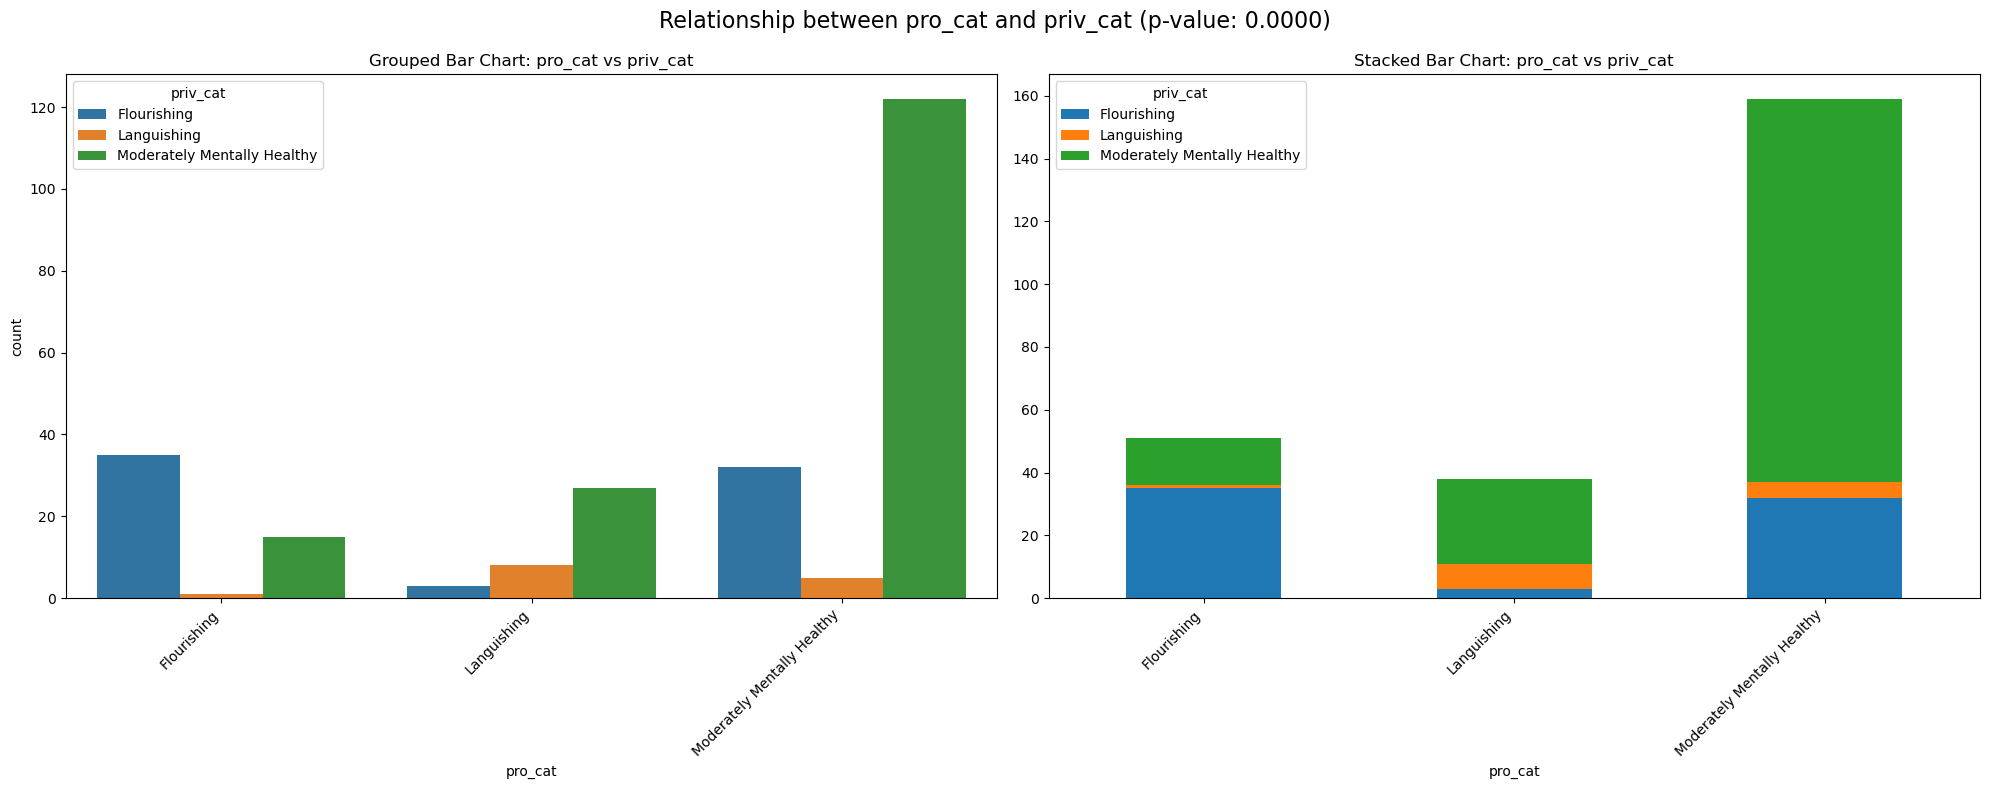

Completed plot 4 of 6


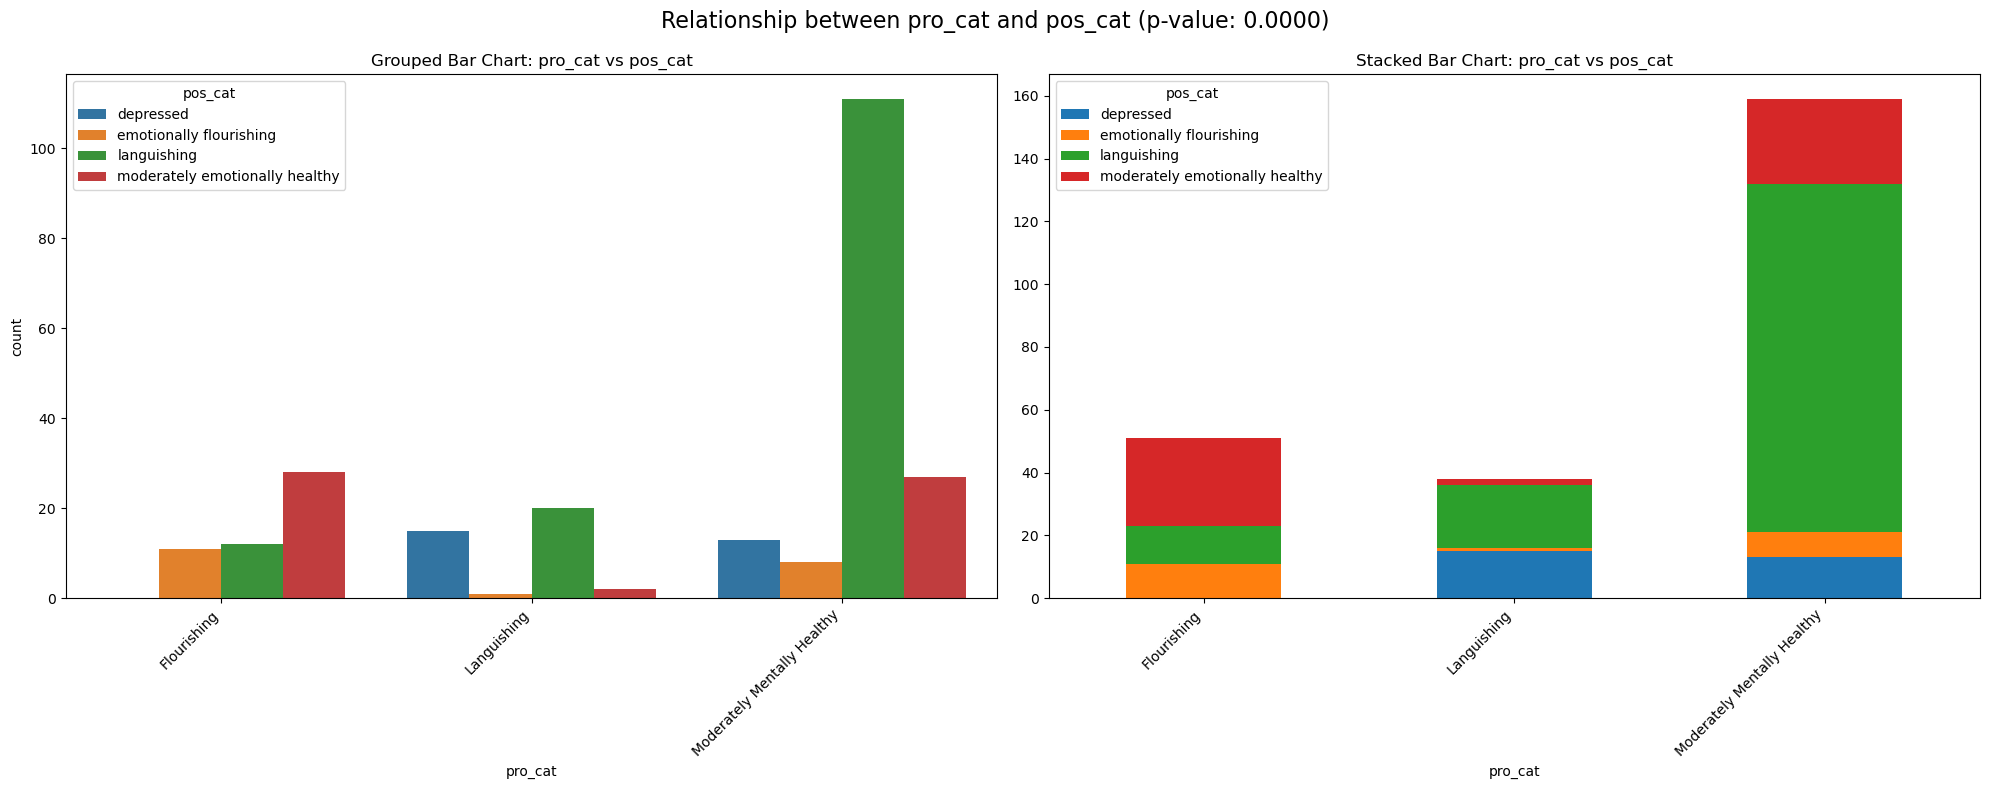

Completed plot 5 of 6


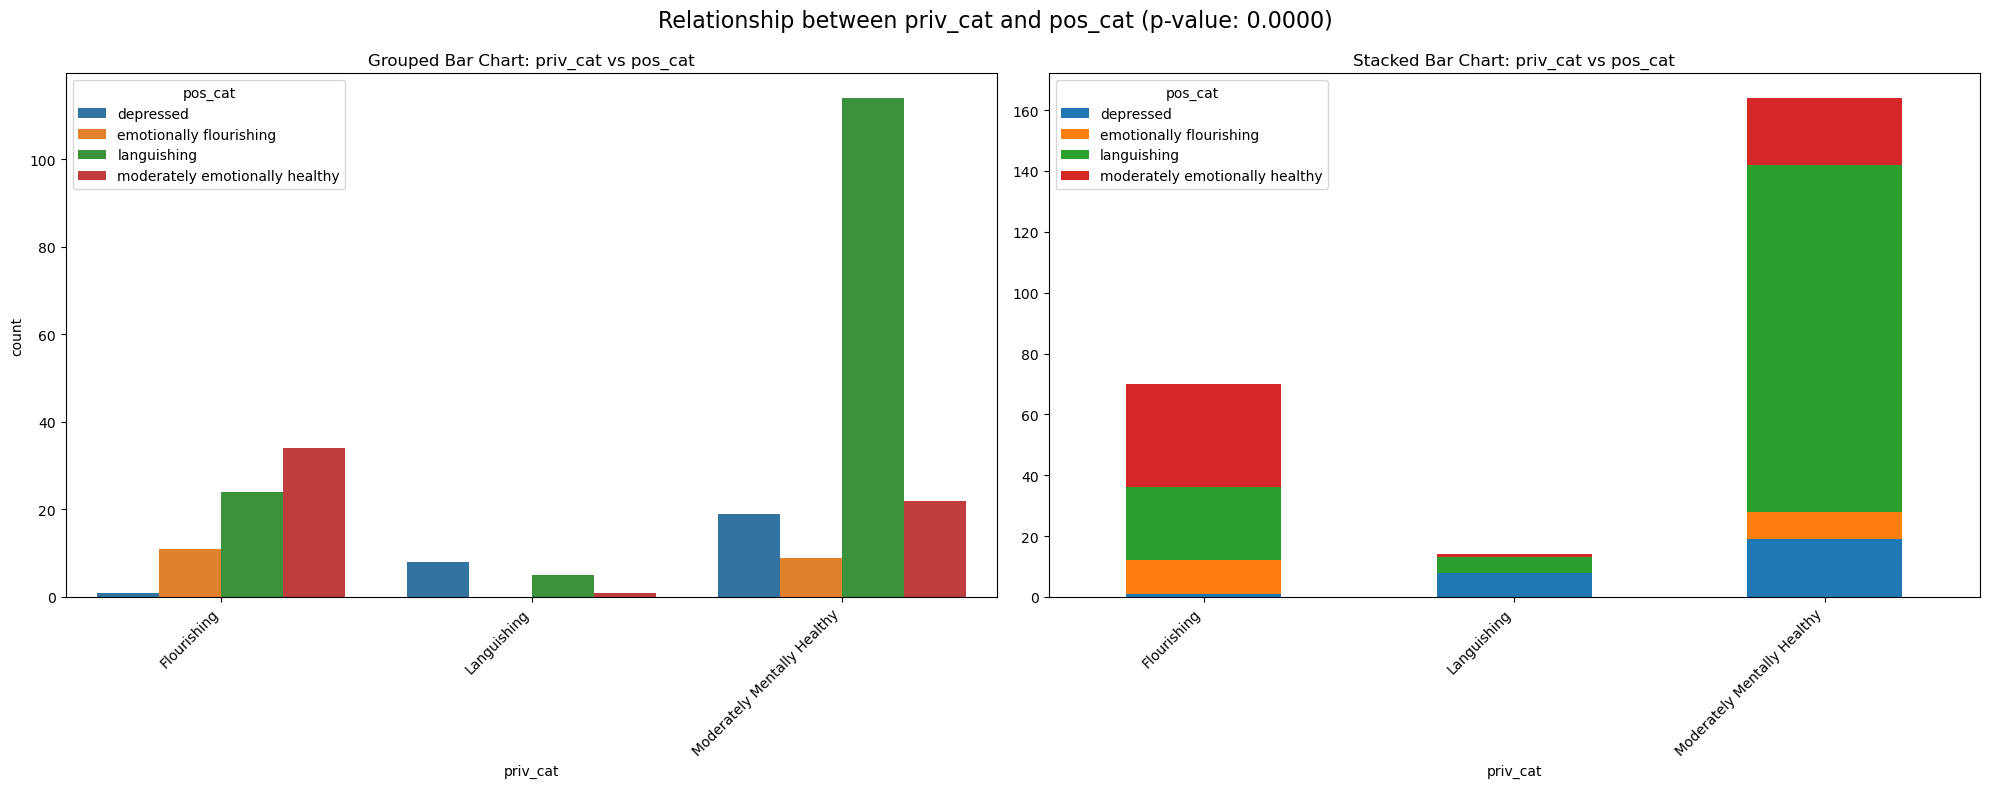

Completed plot 6 of 6


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i, item in enumerate(siginicant_list):
    contingency_df, var1, var2, pvalue = item
    
    # Reset index to make sure we have a proper DataFrame
    contingency_df = contingency_df.reset_index()
    
    # Melt the DataFrame to long format
    melted_df = pd.melt(contingency_df, id_vars=var1, var_name=var2, value_name='count')
    
    # Ensure the 'count' column is numeric
    melted_df['count'] = pd.to_numeric(melted_df['count'], errors='coerce')
    
    # Drop any rows with NaN values
    melted_df = melted_df.dropna()
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Grouped bar chart
    sns.barplot(x=var1, y='count', hue=var2, data=melted_df, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_title(f'Grouped Bar Chart: {var1} vs {var2}')
    
    # Stacked bar chart
    pivot_data = melted_df.pivot(index=var1, columns=var2, values='count')
    pivot_data.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_title(f'Stacked Bar Chart: {var1} vs {var2}')
    
    # Add overall title with p-value
    plt.suptitle(f'Relationship between {var1} and {var2} (p-value: {pvalue:.4f})', fontsize=16)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust for the overall title
    plt.show()
    
    print(f"Completed plot {i+1} of {len(siginicant_list)}")

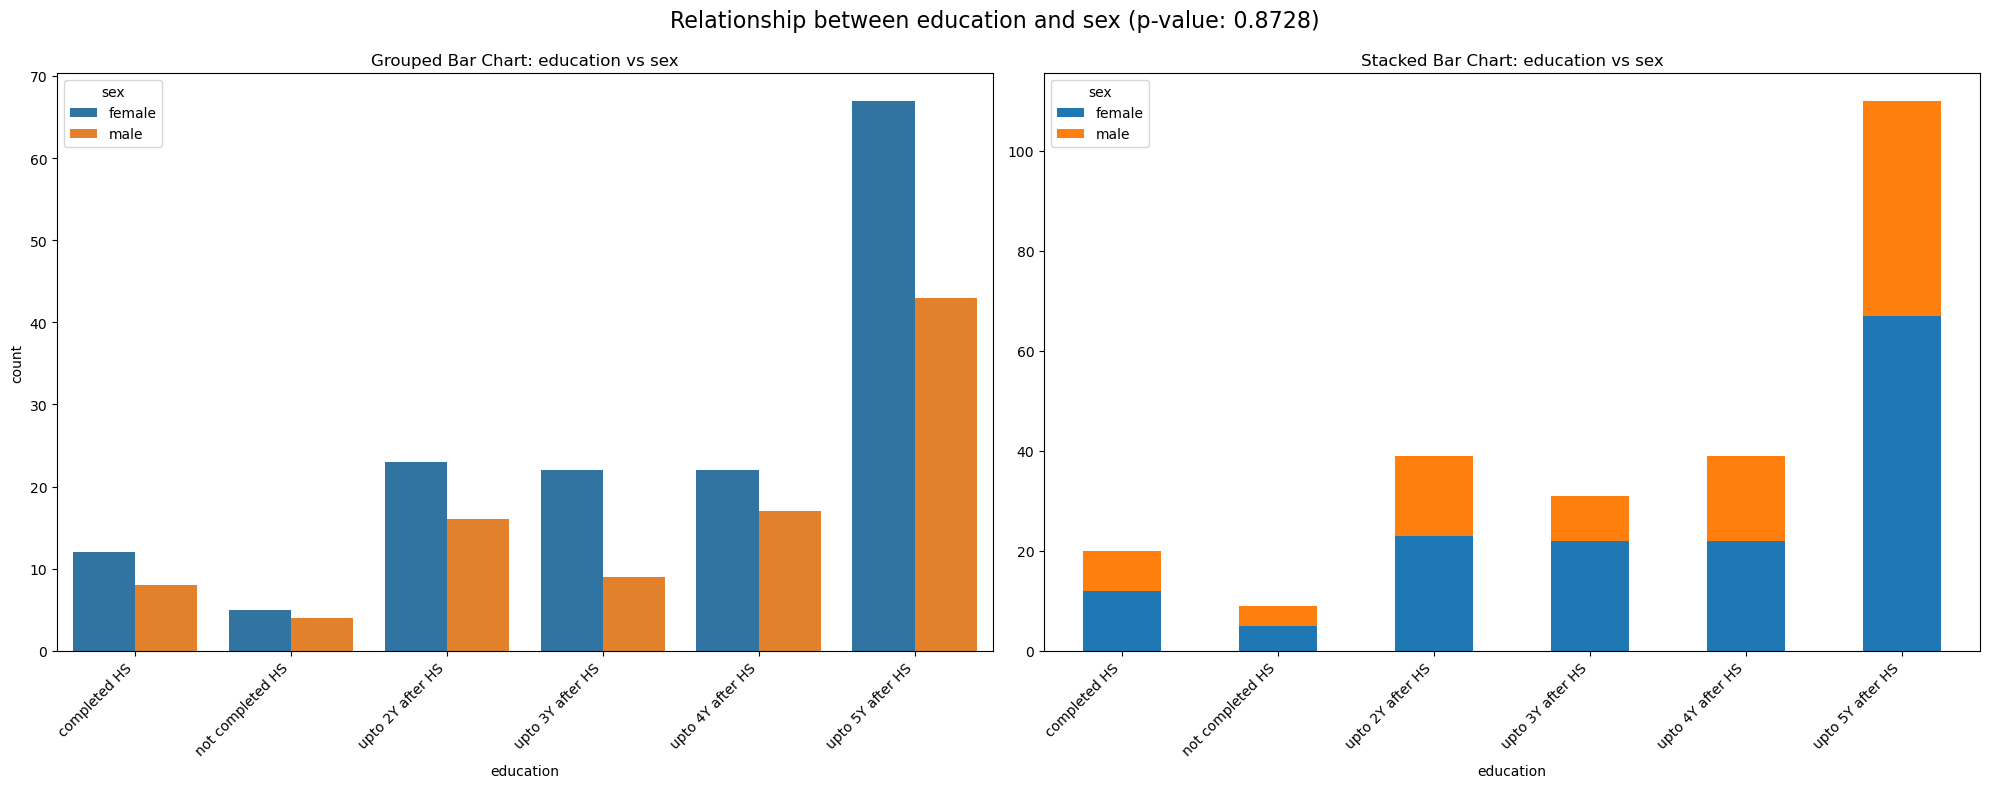

Completed plot 1 of 6


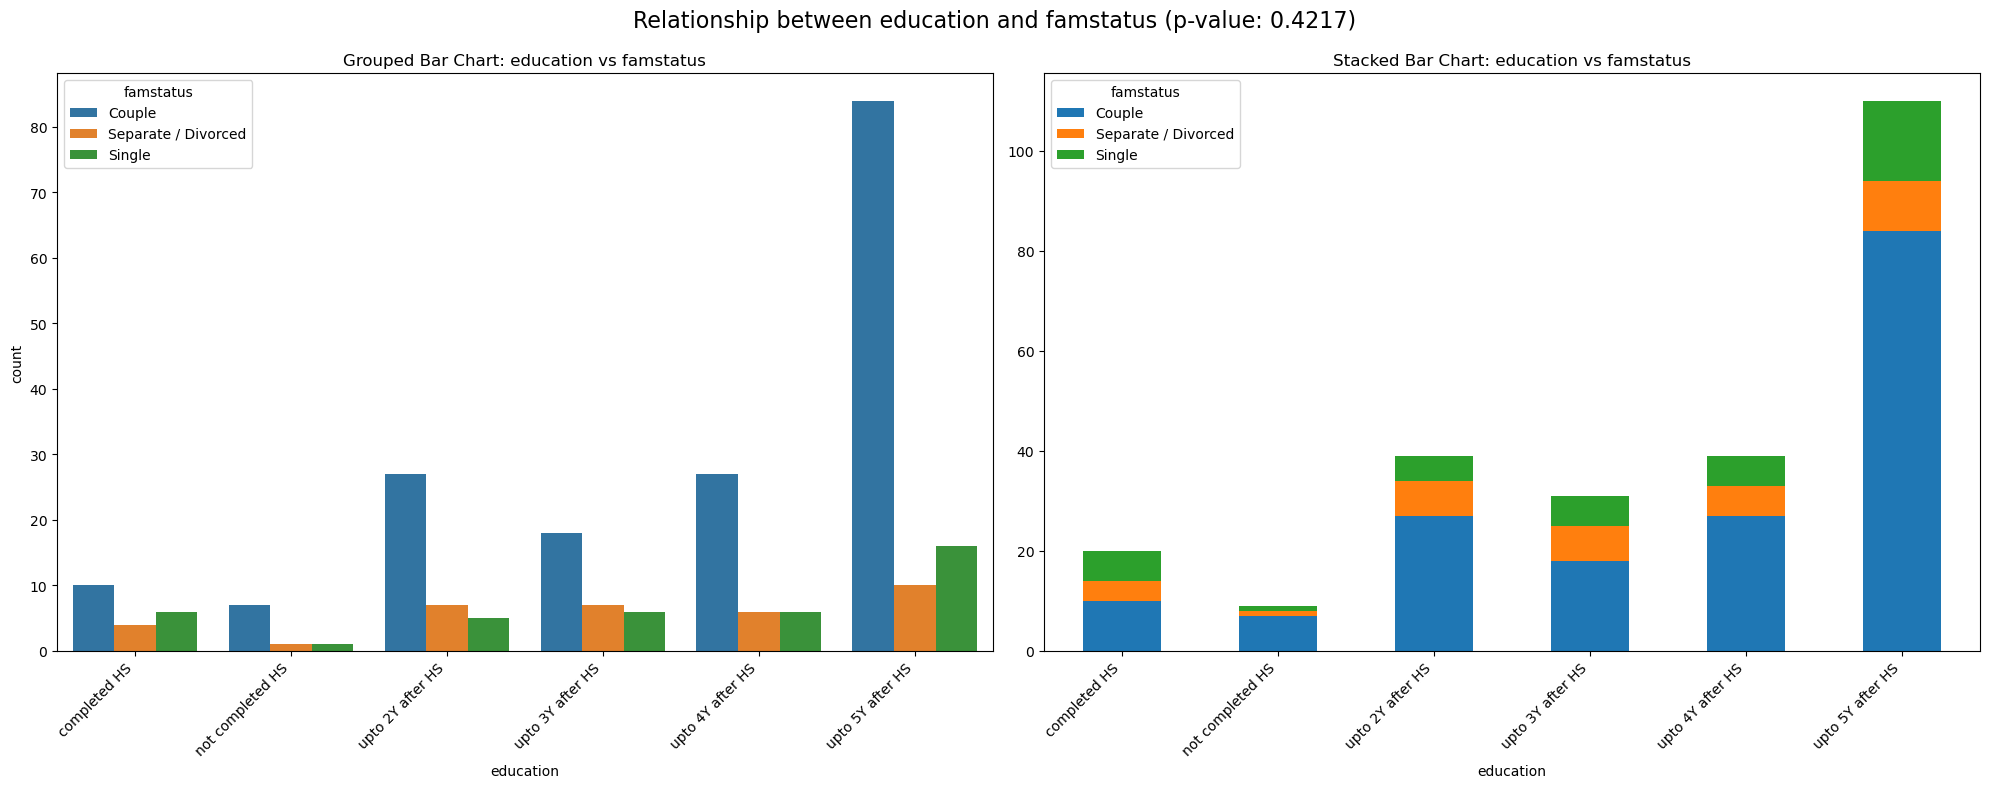

Completed plot 2 of 6


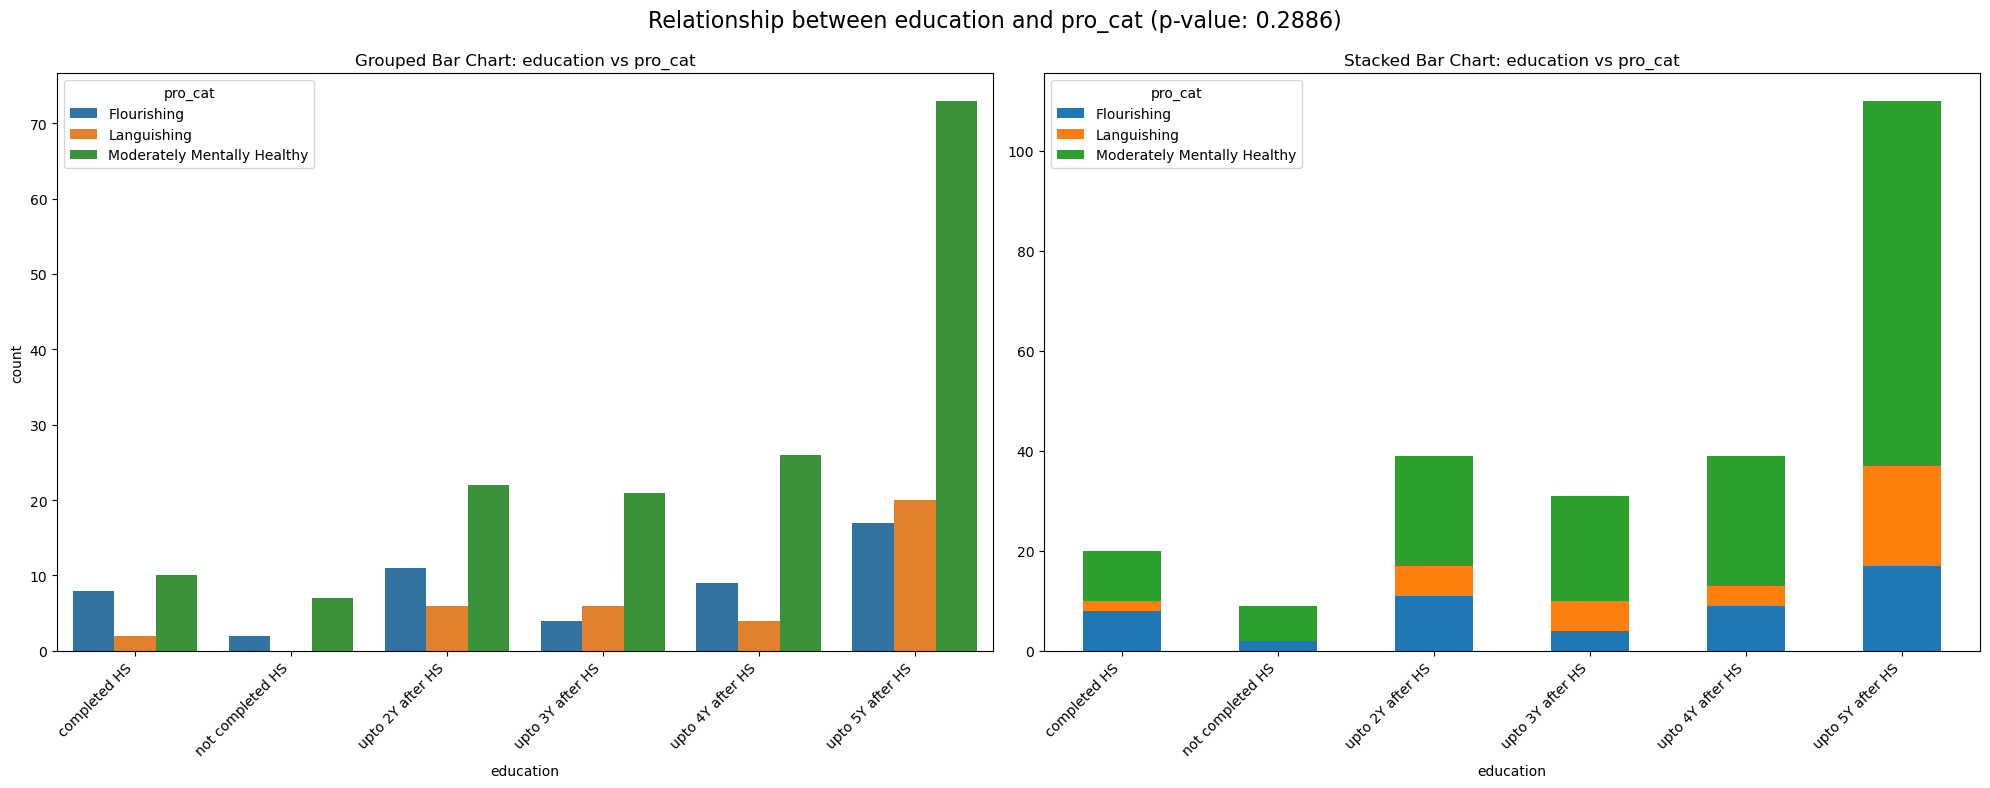

Completed plot 3 of 6


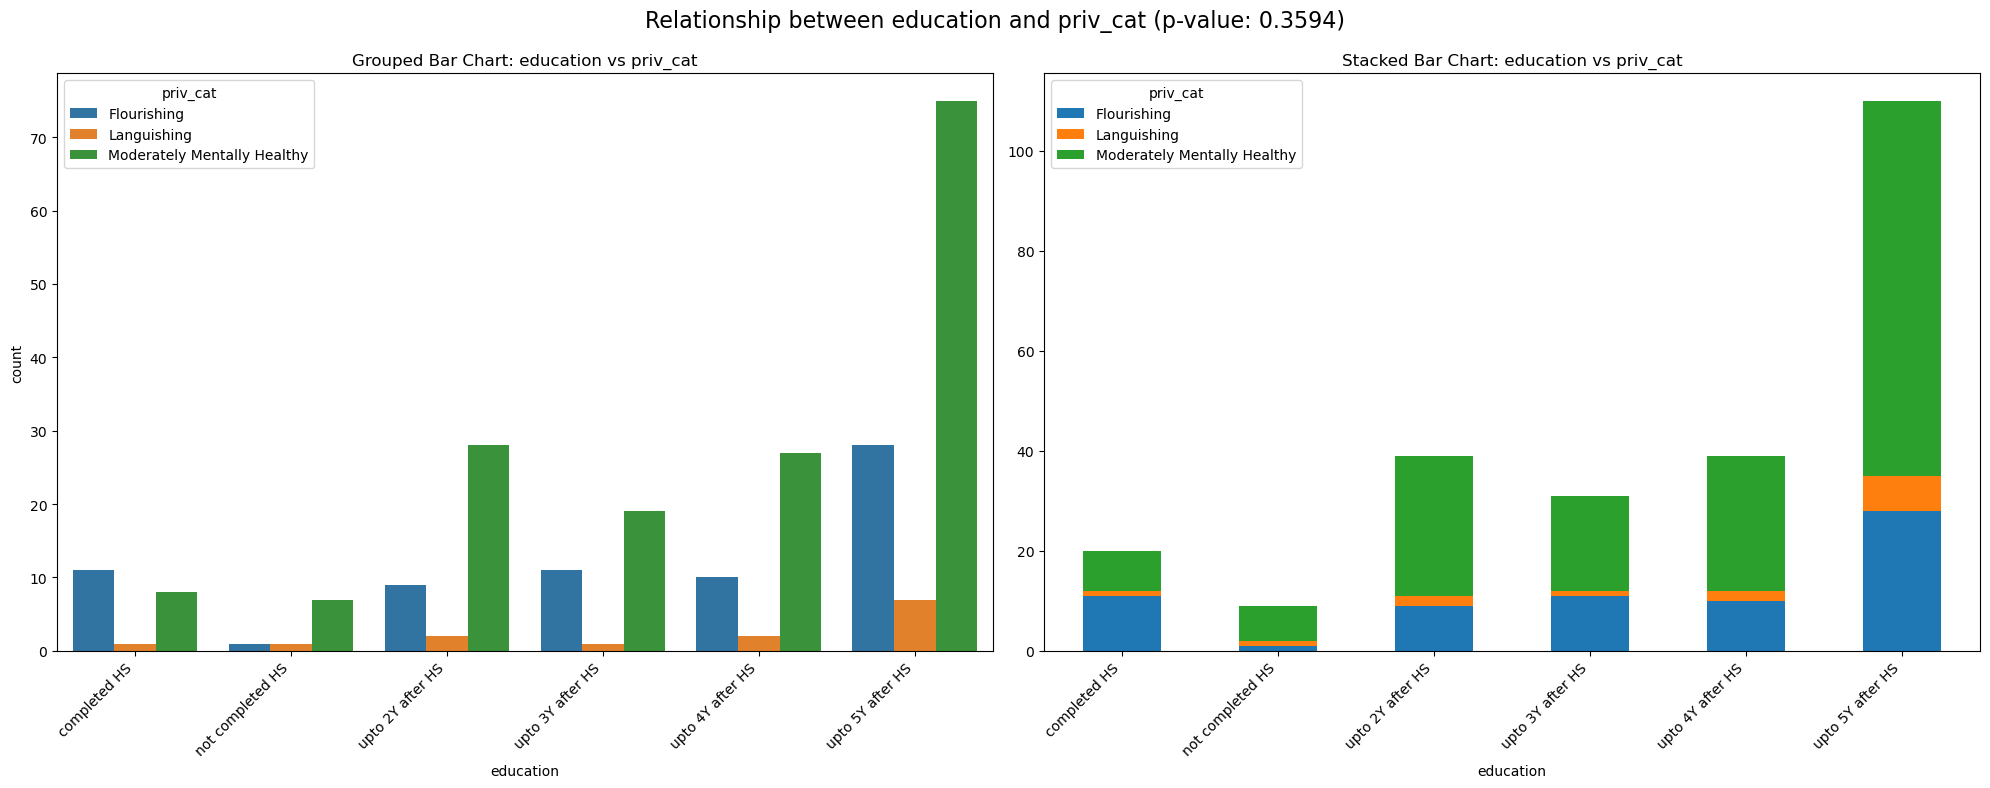

Completed plot 4 of 6


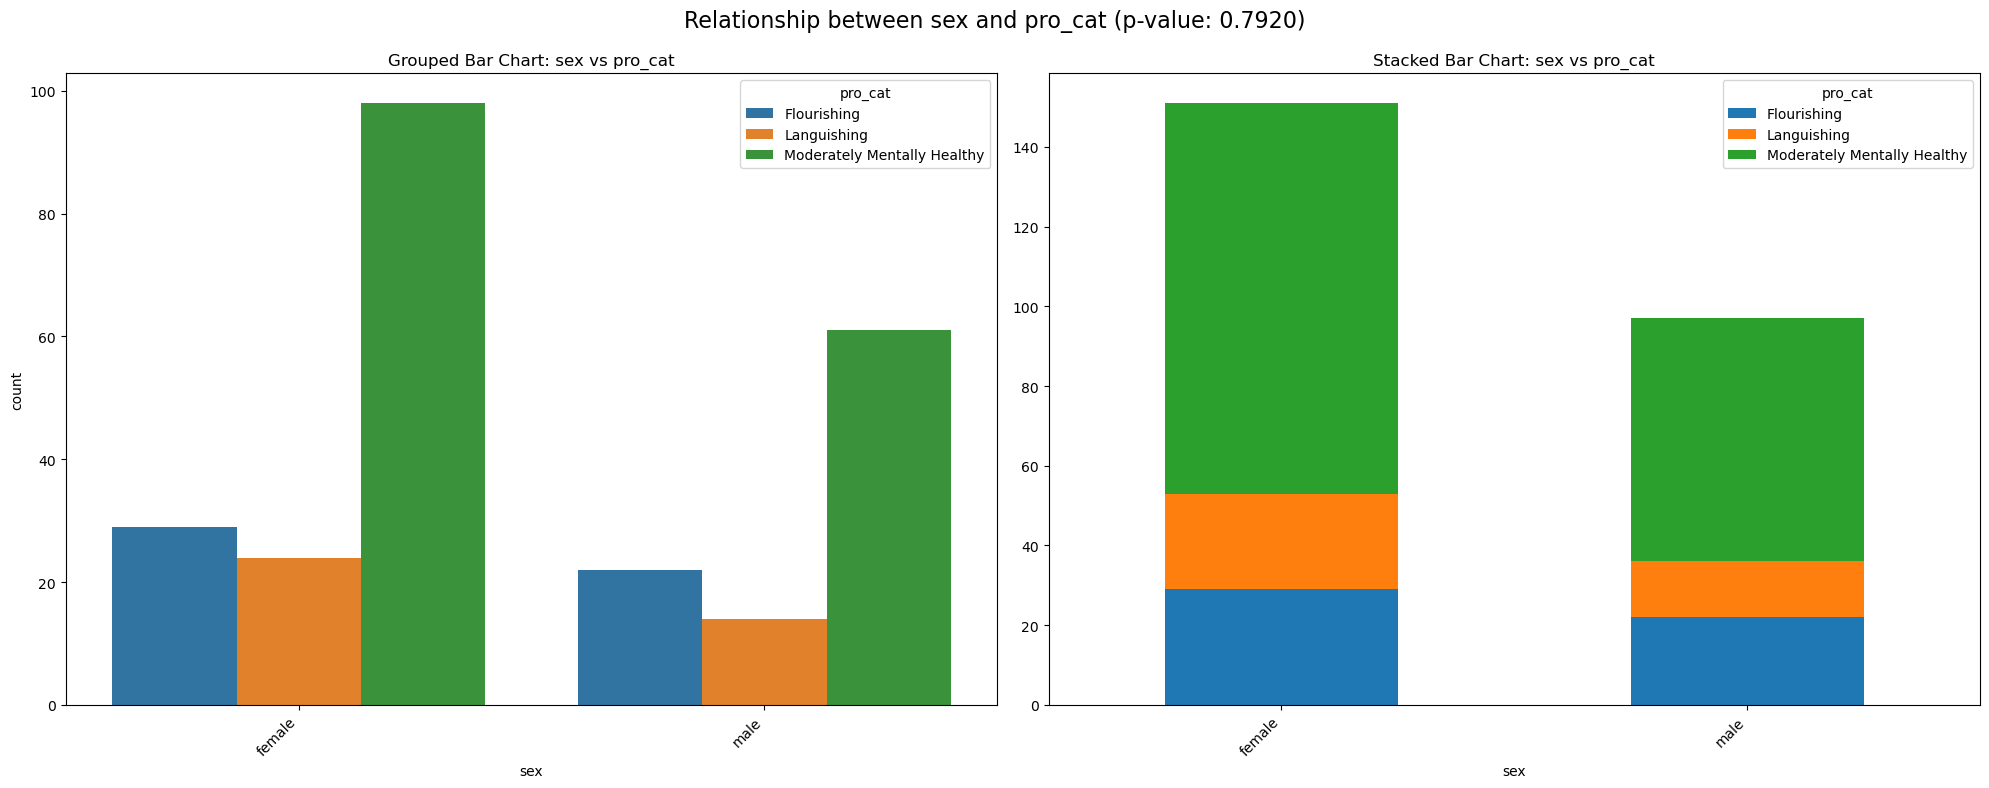

Completed plot 5 of 6


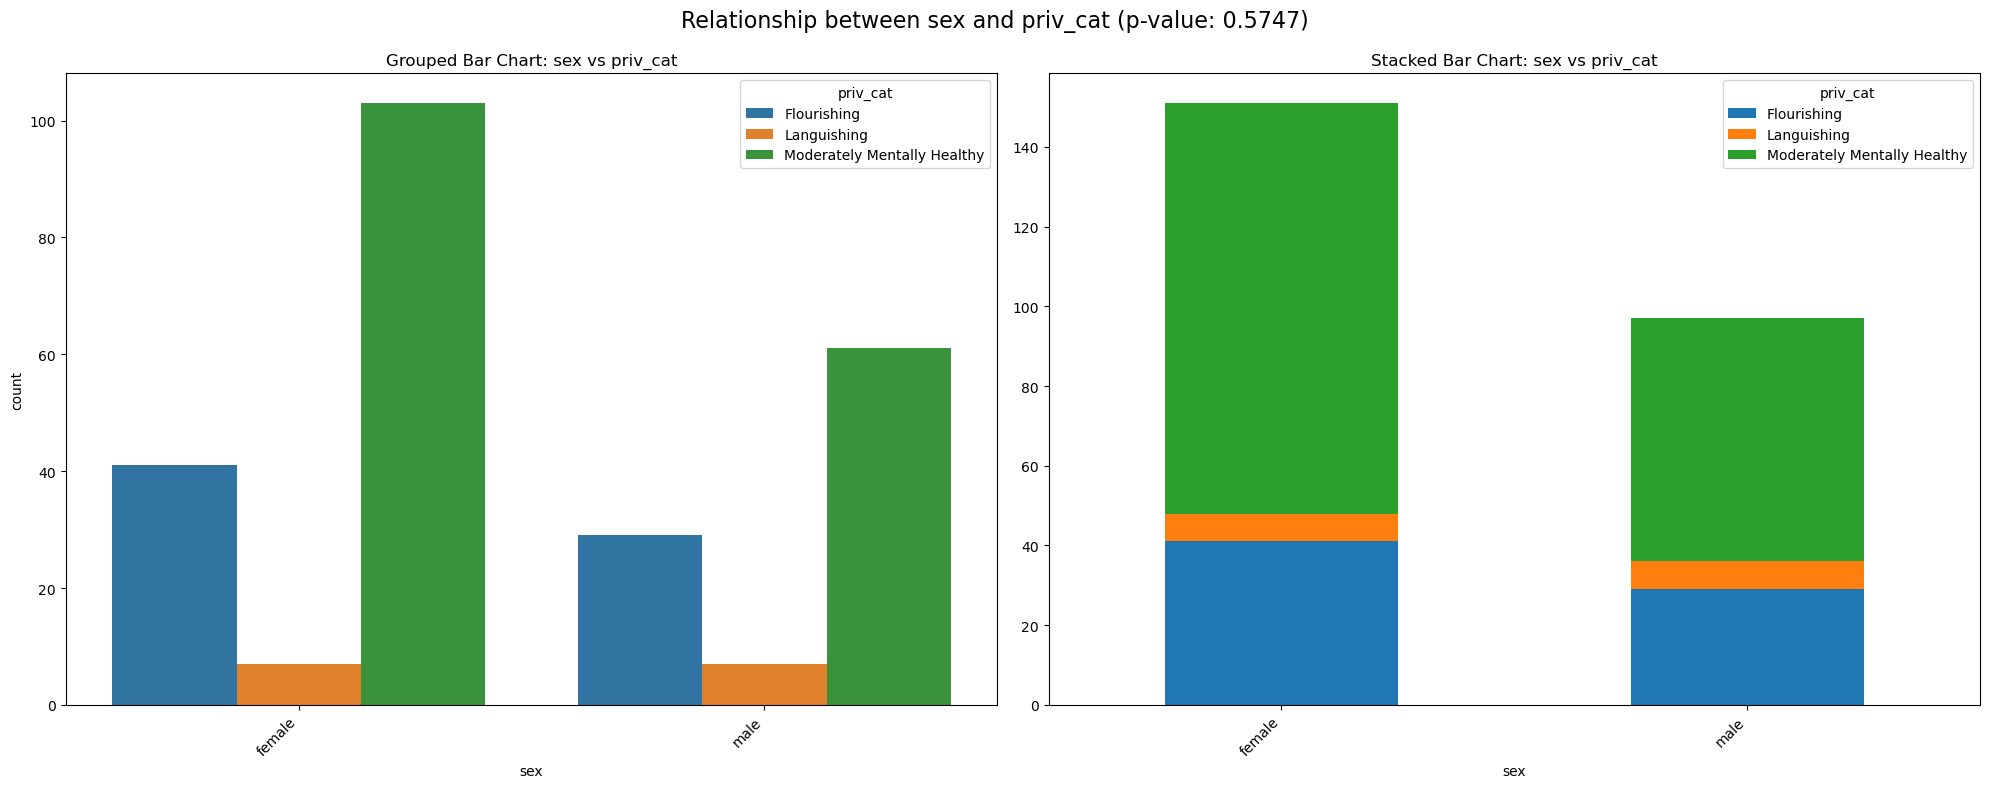

Completed plot 6 of 6


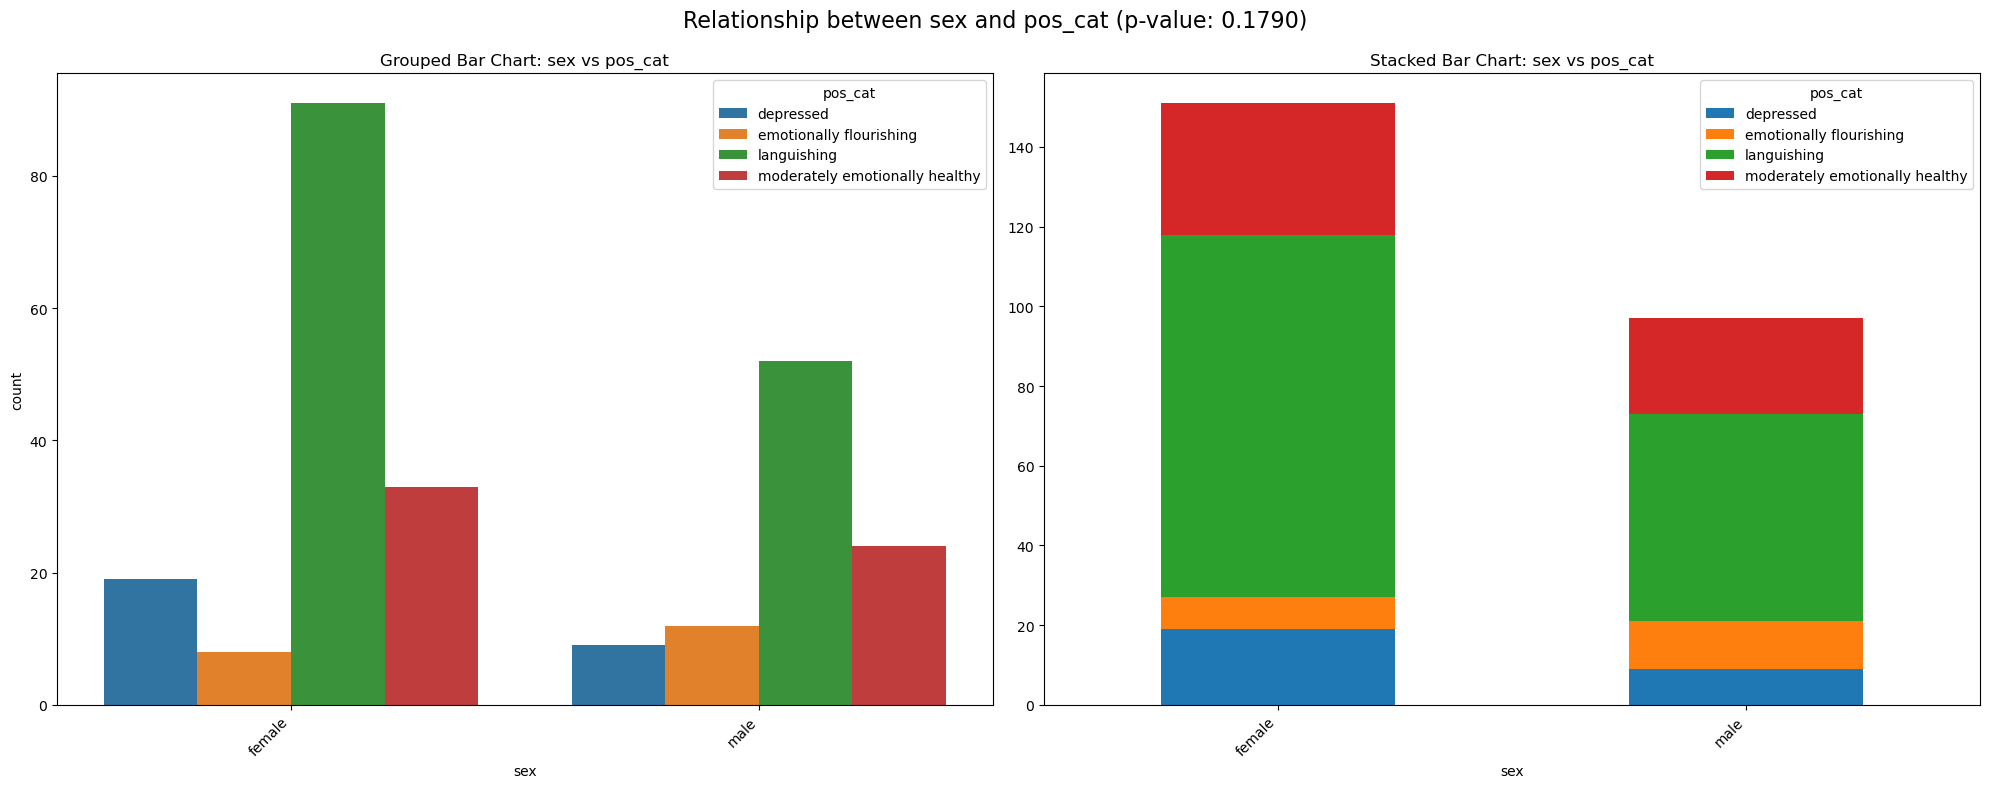

Completed plot 7 of 6


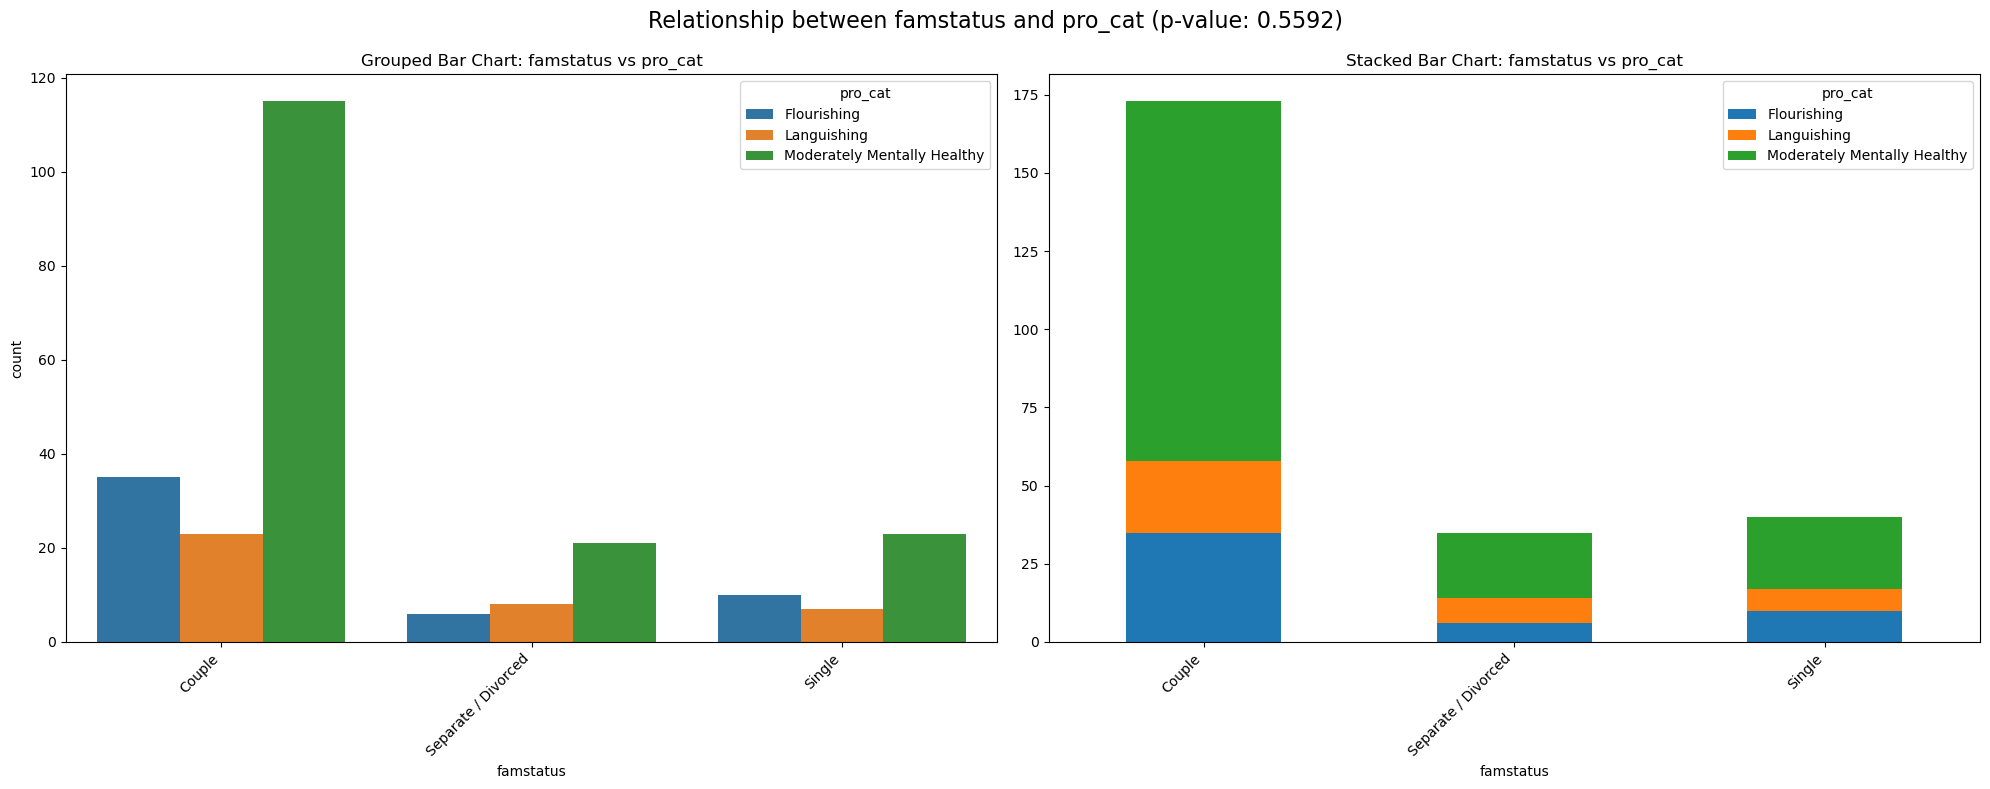

Completed plot 8 of 6


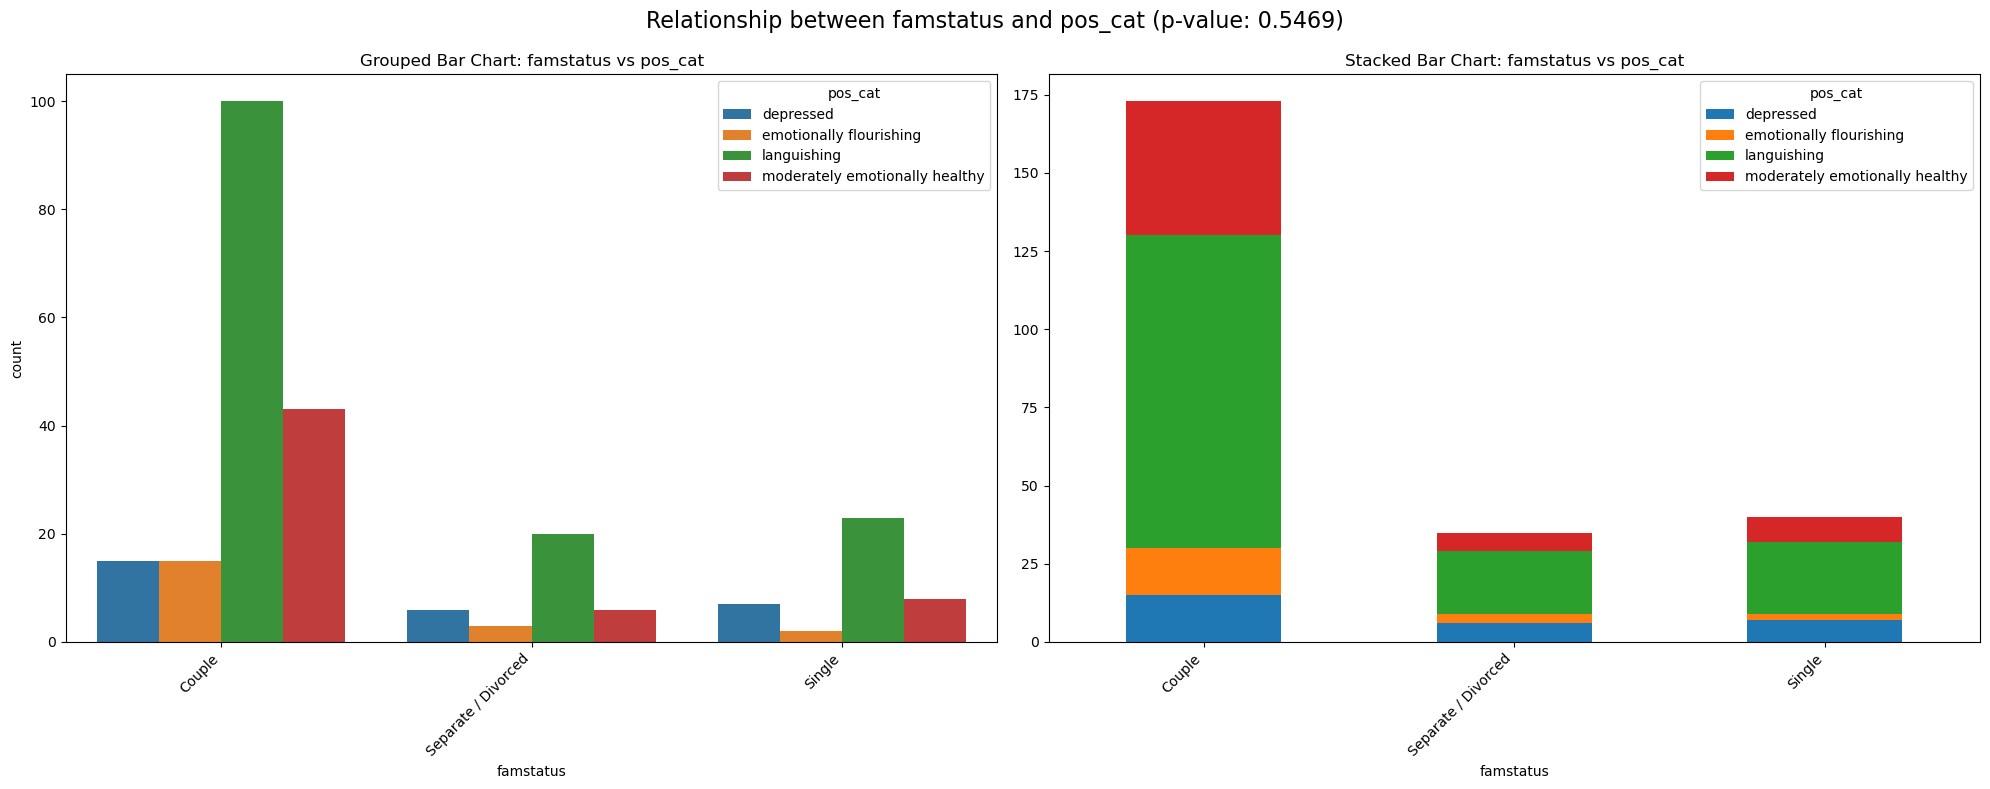

Completed plot 9 of 6


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i, item in enumerate(non_significant_list):
    contingency_df, var1, var2, pvalue = item
    
    # Reset index to make sure we have a proper DataFrame
    contingency_df = contingency_df.reset_index()
    
    # Melt the DataFrame to long format
    melted_df = pd.melt(contingency_df, id_vars=var1, var_name=var2, value_name='count')
    
    # Ensure the 'count' column is numeric
    melted_df['count'] = pd.to_numeric(melted_df['count'], errors='coerce')
    
    # Drop any rows with NaN values
    melted_df = melted_df.dropna()
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Grouped bar chart
    sns.barplot(x=var1, y='count', hue=var2, data=melted_df, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_title(f'Grouped Bar Chart: {var1} vs {var2}')
    
    # Stacked bar chart
    pivot_data = melted_df.pivot(index=var1, columns=var2, values='count')
    pivot_data.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_title(f'Stacked Bar Chart: {var1} vs {var2}')
    
    # Add overall title with p-value
    plt.suptitle(f'Relationship between {var1} and {var2} (p-value: {pvalue:.4f})', fontsize=16)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust for the overall title
    plt.show()
    
    print(f"Completed plot {i+1} of {len(siginicant_list)}")

### Continous

<Axes: >

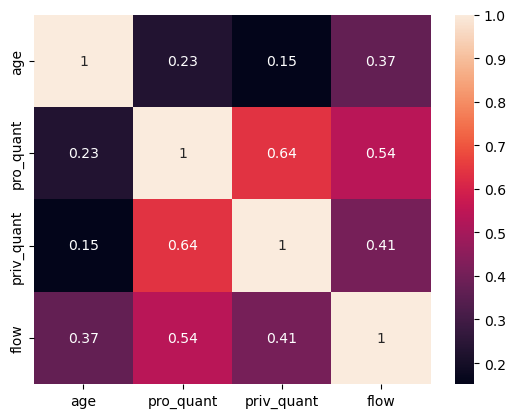

In [23]:
sns.heatmap(df[numerical_cols].corr(),annot=True)

In [24]:
significant_num=[]
nonsignificant_num=[]


# Create a DataFrame
def num_correlation(x,y,a,b):
    # Pearson Correlation
    pearson_corr, pearson_p = stats.pearsonr(df[x], df[y])
    
    # Spearman Correlation
    spearman_corr, spearman_p = stats.spearmanr(df[x], df[y])
    
    print("Pearson Correlation:")
    print(f"Correlation coefficient: {pearson_corr:.4f}")
    print(f"P-value: {pearson_p:.4f}")
    
    print("\nSpearman Correlation:")
    print(f"Correlation coefficient: {spearman_corr:.4f}")
    print(f"P-value: {spearman_p:.4f}")
    
    # Visualize the relationship
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.show()
    
    # Interpret the results
    alpha = 0.05  # Significance level
    
    print("\nInterpretation:")
    if pearson_p < alpha:
        print(f"The Pearson correlation is statistically significant (p={pearson_p:.4f} < {alpha}).")
        if pearson_corr > 0:
            print(f"There is a significant positive correlation (r={pearson_corr:.4f}) between the variables.")
        else:
            print(f"There is a significant negative correlation (r={pearson_corr:.4f}) between the variables.")
        
        if abs(pearson_corr) < 0.3:
            print("The correlation is weak.")
        elif abs(pearson_corr) < 0.7:
            print("The correlation is moderate.")
        else:
            print("The correlation is strong.")
        a.append((x,y))
    else:
        print(f"The Pearson correlation is) not statistically significant (p={pearson_p:.4f} > {alpha}).")
        print("There is not enough evidence to conclude a significant linear relationship between the variables.")
        b.append((x,y))

    


In [25]:
numerical_cols

['age', 'pro_quant', 'priv_quant', 'flow']

age vs pro_quant
Pearson Correlation:
Correlation coefficient: 0.2296
P-value: 0.0003

Spearman Correlation:
Correlation coefficient: 0.2227
P-value: 0.0004


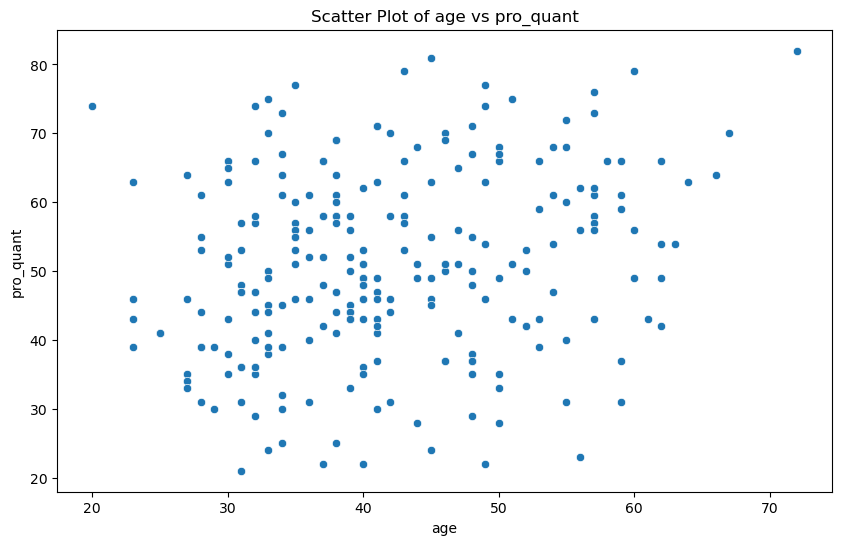


Interpretation:
The Pearson correlation is statistically significant (p=0.0003 < 0.05).
There is a significant positive correlation (r=0.2296) between the variables.
The correlation is weak.
-----------------------------------------------------
age vs priv_quant
Pearson Correlation:
Correlation coefficient: 0.1516
P-value: 0.0169

Spearman Correlation:
Correlation coefficient: 0.1278
P-value: 0.0443


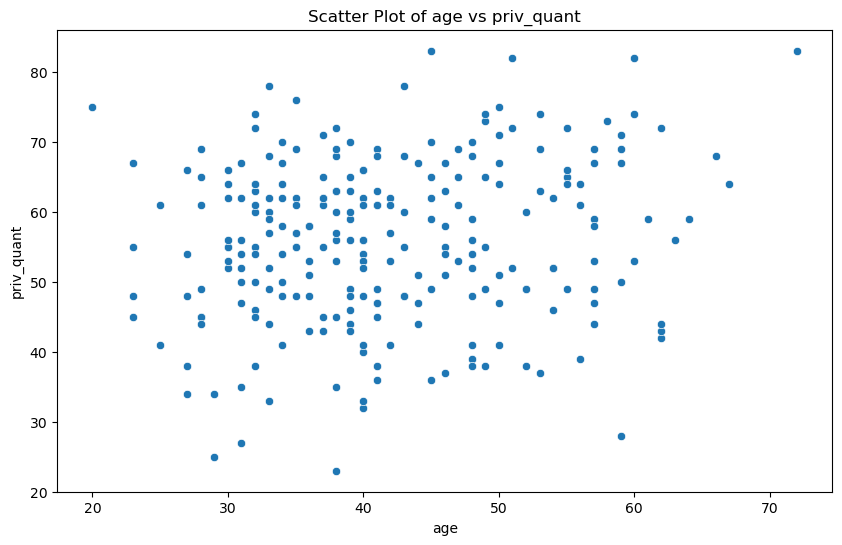


Interpretation:
The Pearson correlation is statistically significant (p=0.0169 < 0.05).
There is a significant positive correlation (r=0.1516) between the variables.
The correlation is weak.
-----------------------------------------------------
age vs flow
Pearson Correlation:
Correlation coefficient: 0.3680
P-value: 0.0000

Spearman Correlation:
Correlation coefficient: 0.3507
P-value: 0.0000


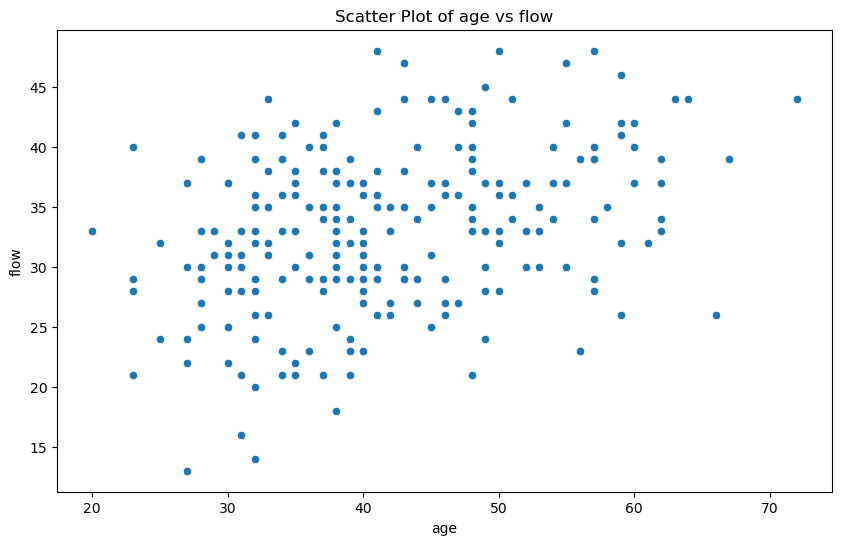


Interpretation:
The Pearson correlation is statistically significant (p=0.0000 < 0.05).
There is a significant positive correlation (r=0.3680) between the variables.
The correlation is moderate.
-----------------------------------------------------
pro_quant vs priv_quant
Pearson Correlation:
Correlation coefficient: 0.6357
P-value: 0.0000

Spearman Correlation:
Correlation coefficient: 0.6218
P-value: 0.0000


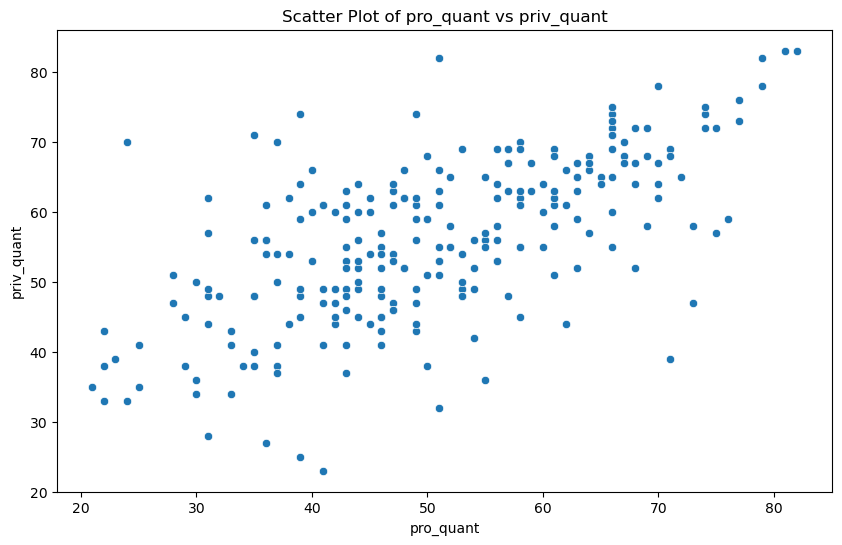


Interpretation:
The Pearson correlation is statistically significant (p=0.0000 < 0.05).
There is a significant positive correlation (r=0.6357) between the variables.
The correlation is moderate.
-----------------------------------------------------
pro_quant vs flow
Pearson Correlation:
Correlation coefficient: 0.5362
P-value: 0.0000

Spearman Correlation:
Correlation coefficient: 0.5349
P-value: 0.0000


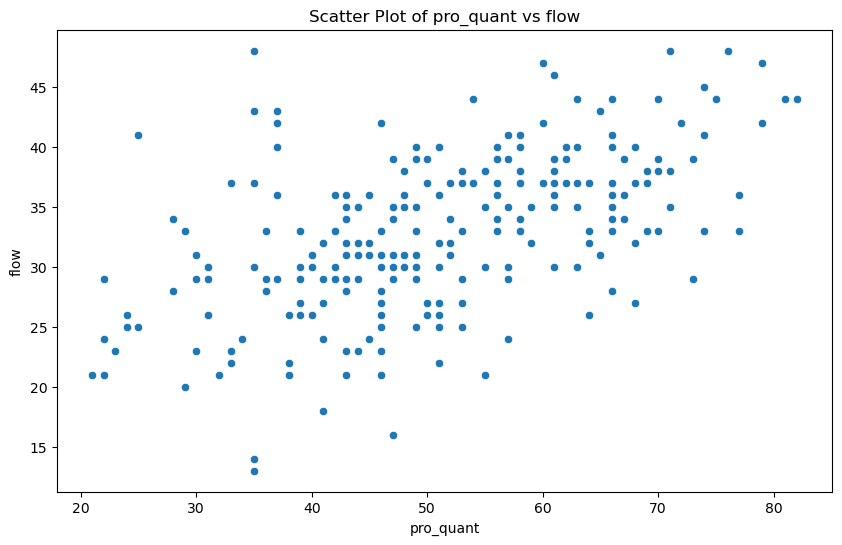


Interpretation:
The Pearson correlation is statistically significant (p=0.0000 < 0.05).
There is a significant positive correlation (r=0.5362) between the variables.
The correlation is moderate.
-----------------------------------------------------
priv_quant vs flow
Pearson Correlation:
Correlation coefficient: 0.4094
P-value: 0.0000

Spearman Correlation:
Correlation coefficient: 0.3860
P-value: 0.0000


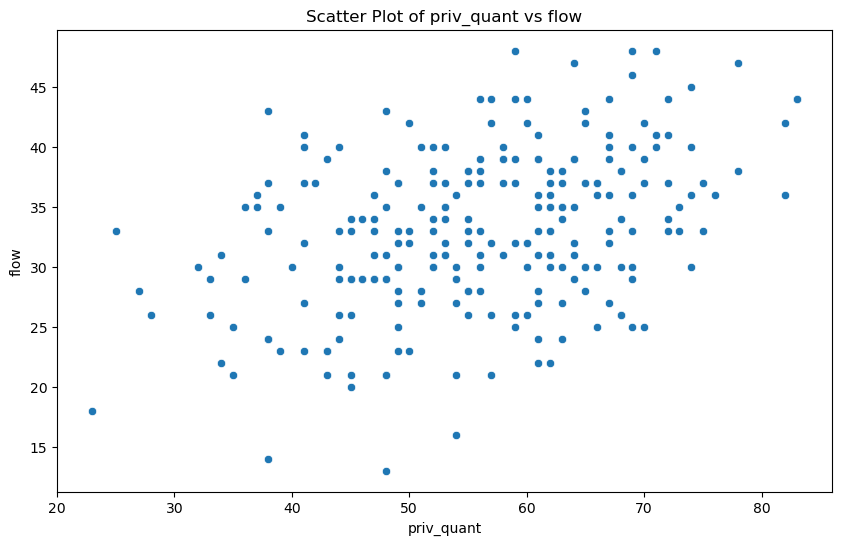


Interpretation:
The Pearson correlation is statistically significant (p=0.0000 < 0.05).
There is a significant positive correlation (r=0.4094) between the variables.
The correlation is moderate.
-----------------------------------------------------


In [27]:
from scipy import stats

for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)): 
        print(f"{numerical_cols[i]} vs {numerical_cols[j]}")
        num_correlation(numerical_cols[i],numerical_cols[j],significant_num,nonsignificant_num)
        print("-----------------------------------------------------")

In [28]:
significant_num

[('age', 'pro_quant'),
 ('age', 'priv_quant'),
 ('age', 'flow'),
 ('pro_quant', 'priv_quant'),
 ('pro_quant', 'flow'),
 ('priv_quant', 'flow')]

### Mixed

https://jooskorstanje.com/1_Way_ANOVA_Pizza_Delivery.html

In [33]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def anova_and_boxplot(df, numerical_cols, categorical_cols, alpha=0.05):
    significant_pairs = []
    nonsignificant_pairs = []
    
    for num_col in numerical_cols:
        for cat_col in categorical_cols:
            print(f"\nAnalysis for {num_col} vs {cat_col}:")
            
            # Perform one-way ANOVA and create ANOVA table
            groups = df.groupby(cat_col)[num_col]
            group_labels = groups.groups.keys()
            
            grand_mean = df[num_col].mean()
            overall_ss = ((df[num_col] - grand_mean) ** 2).sum()
            overall_df = len(df) - 1

            group_means = groups.mean()
            between_ss = sum(len(group) * (mean - grand_mean) ** 2 for mean, group in zip(group_means, groups))
            between_df = len(group_labels) - 1

            within_ss = overall_ss - between_ss
            within_df = overall_df - between_df

            between_ms = between_ss / between_df
            within_ms = within_ss / within_df

            f_value = between_ms / within_ms
            p_value = 1 - stats.f.cdf(f_value, between_df, within_df)

            # Print ANOVA table
            print("\nANOVA Table:")
            anova_table = pd.DataFrame({
                'Source': ['Between Groups', 'Within Groups', 'Total'],
                'SS': [between_ss, within_ss, overall_ss],
                'df': [between_df, within_df, overall_df],
                'MS': [between_ms, within_ms, np.nan],
                'F': [f_value, np.nan, np.nan],
                'p-value': [p_value, np.nan, np.nan]
            })
            anova_table = anova_table.set_index('Source')
            anova_table['SS'] = anova_table['SS'].round(4)
            anova_table['MS'] = anova_table['MS'].round(4)
            anova_table['F'] = anova_table['F'].round(4)
            anova_table['p-value'] = anova_table['p-value'].round(4)
            print(anova_table.to_string())
            
            # Check significance
            if p_value < alpha:
                print(f"\nThe difference between groups is statistically significant (p={p_value:.4f}).")
                significant_pairs.append((num_col, cat_col))
            else:
                print(f"\nThe difference between groups is not statistically significant (p={p_value:.4f}).")
                nonsignificant_pairs.append((num_col, cat_col))
            
            # Create grouped box plot
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f"Box Plot of {num_col} by {cat_col}")
            plt.xlabel(cat_col)
            plt.ylabel(num_col)
            if p_value < alpha:
                plt.suptitle("Statistically Significant Difference", color='green')
            else:
                plt.suptitle("No Statistically Significant Difference", color='red')
            plt.tight_layout()
            plt.show()
            
            print("-----------------------------------------------------")
    
    return significant_pairs, nonsignificant_pairs
    
   


Analysis for age vs education:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups    131.7066    5   26.3413  0.2516   0.9388
Within Groups   25337.7612  242  104.7015     NaN      NaN
Total           25469.4677  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9388).


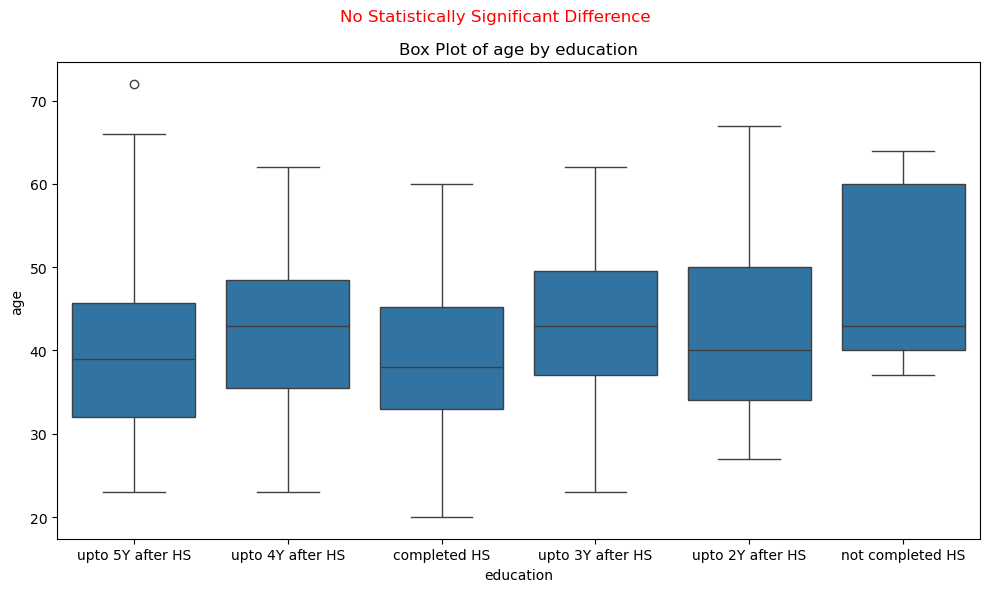

-----------------------------------------------------

Analysis for age vs sex:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups      0.7360    1    0.7360  0.0071   0.9329
Within Groups   25468.7317  246  103.5314     NaN      NaN
Total           25469.4677  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9329).


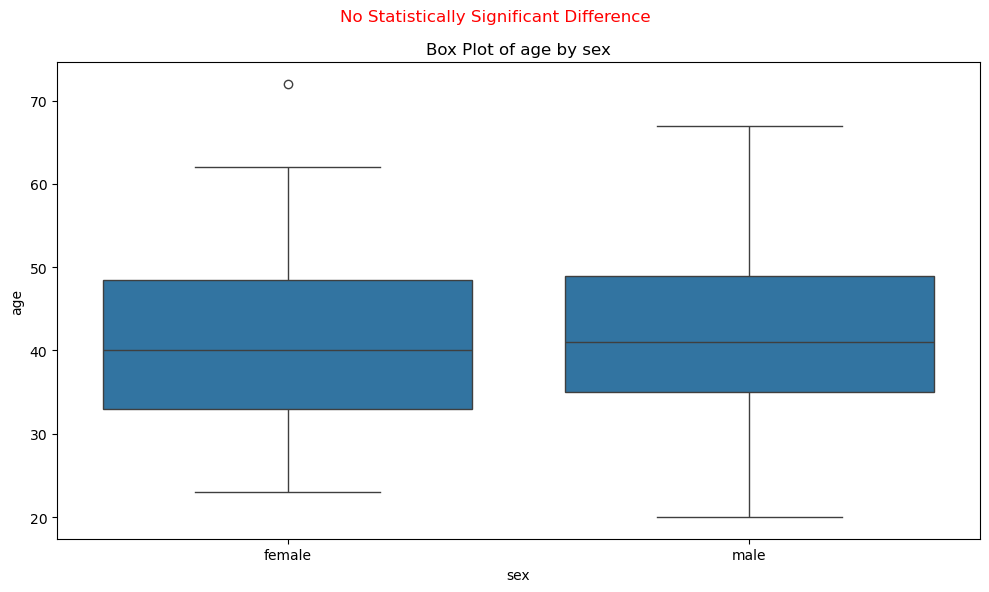

-----------------------------------------------------

Analysis for age vs famstatus:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups    159.4587    2   79.7294  0.7718   0.4633
Within Groups   25310.0090  245  103.3062     NaN      NaN
Total           25469.4677  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.4633).


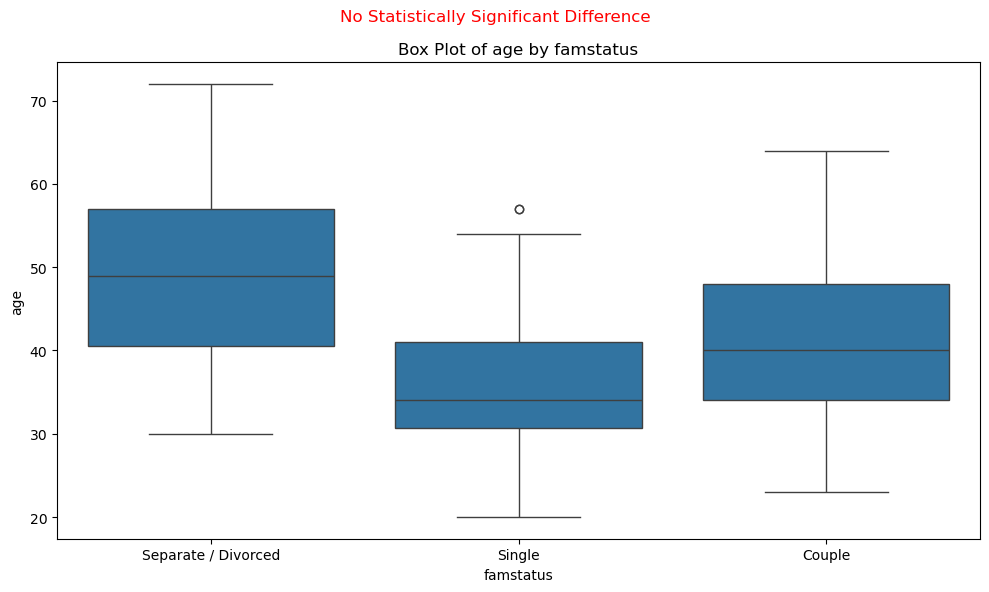

-----------------------------------------------------

Analysis for age vs pro_cat:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups     37.5005    2   18.7502  0.1806   0.8349
Within Groups   25431.9673  245  103.8039     NaN      NaN
Total           25469.4677  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.8349).


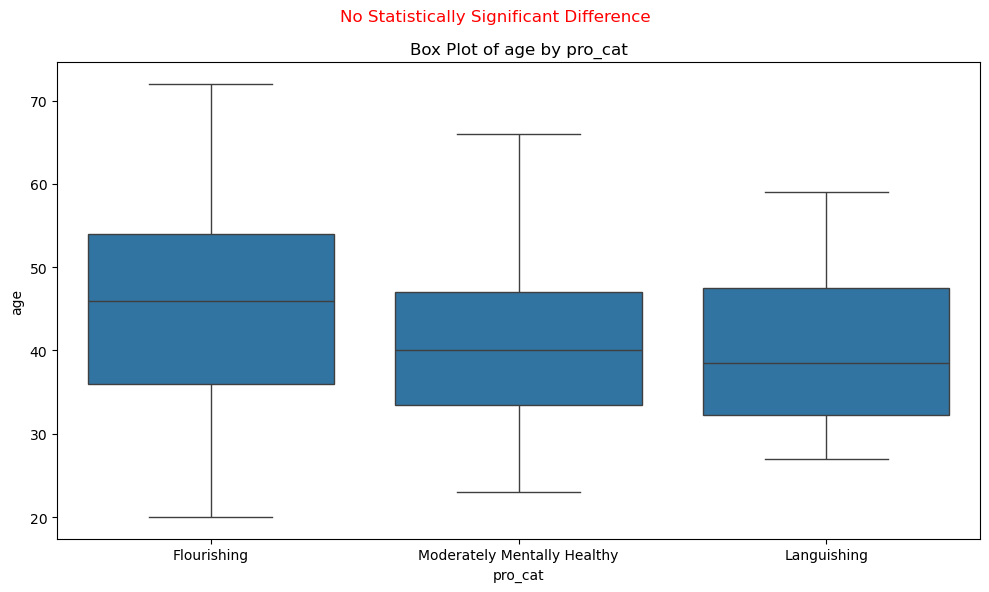

-----------------------------------------------------

Analysis for age vs priv_cat:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups     23.7892    2   11.8946  0.1145   0.8918
Within Groups   25445.6786  245  103.8599     NaN      NaN
Total           25469.4677  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.8918).


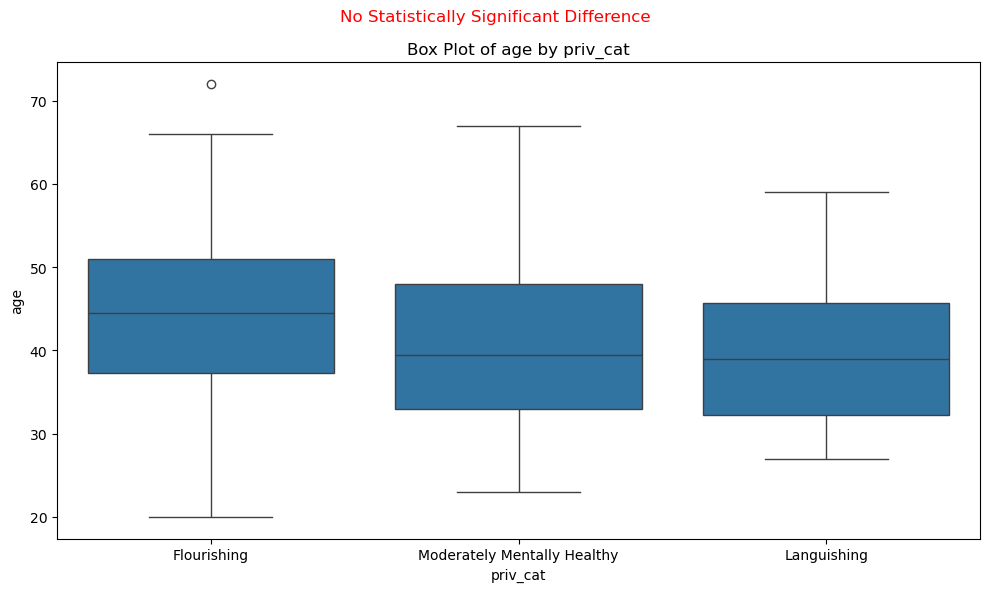

-----------------------------------------------------

Analysis for age vs pos_cat:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups    111.7342    3   37.2447  0.3584   0.7831
Within Groups   25357.7335  244  103.9251     NaN      NaN
Total           25469.4677  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.7831).


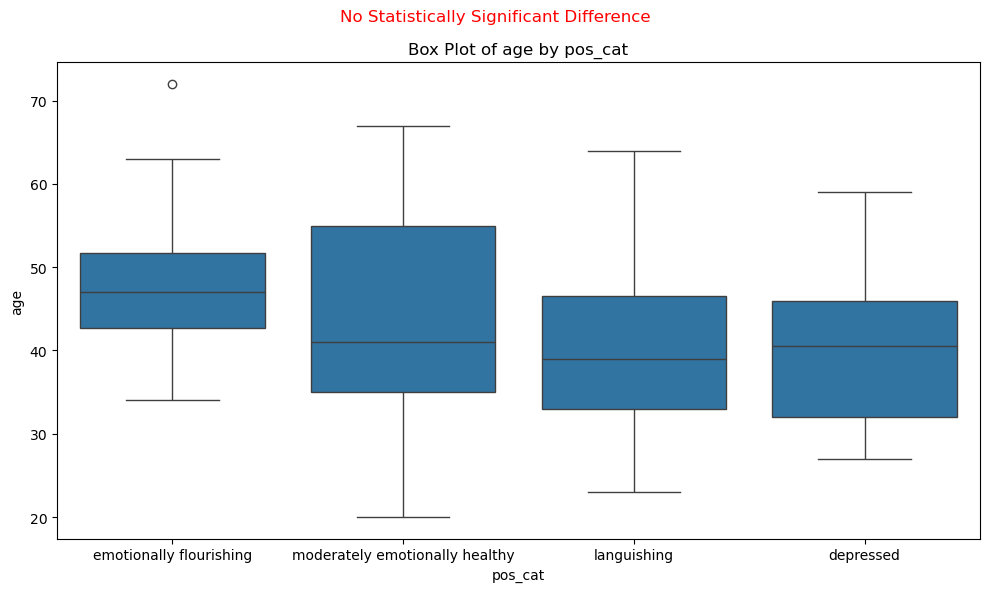

-----------------------------------------------------

Analysis for pro_quant vs education:

ANOVA Table:
                        SS   df       MS       F  p-value
Source                                                   
Between Groups    177.3152    5   35.463  0.1934   0.9649
Within Groups   44383.5235  242  183.403     NaN      NaN
Total           44560.8387  247      NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9649).


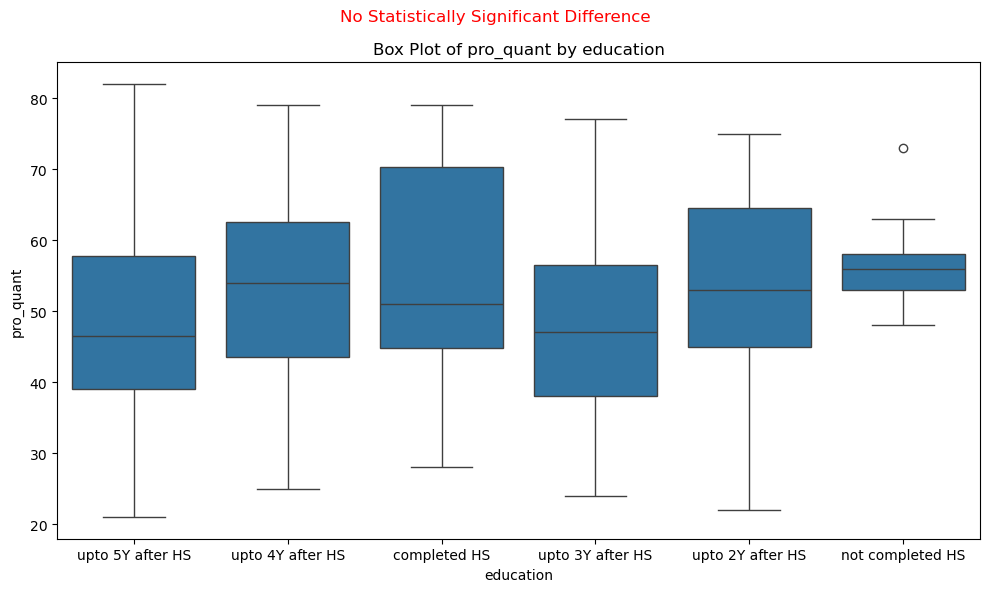

-----------------------------------------------------

Analysis for pro_quant vs sex:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups      2.7414    1    2.7414  0.0151   0.9022
Within Groups   44558.0973  246  181.1305     NaN      NaN
Total           44560.8387  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9022).


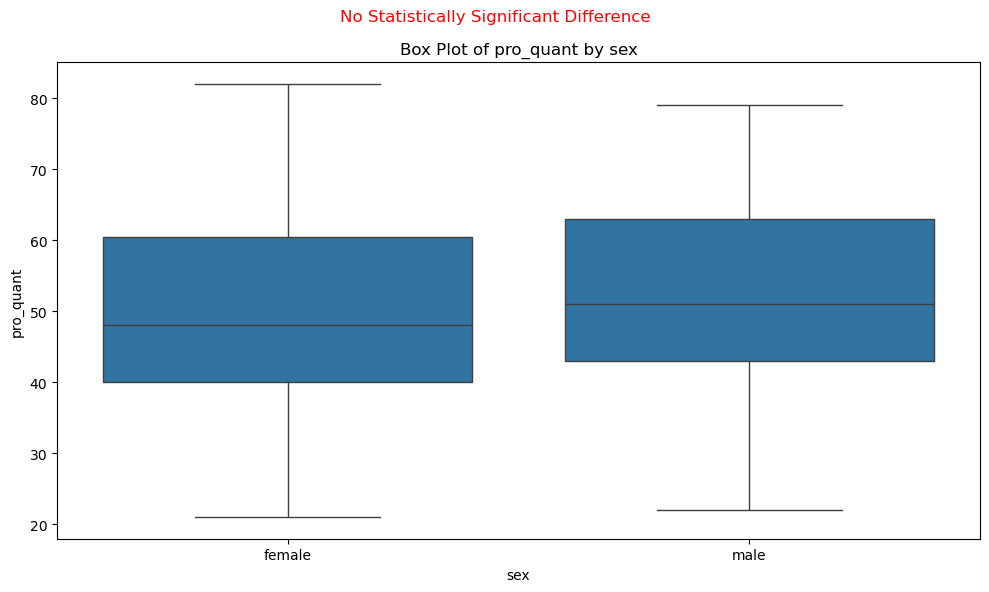

-----------------------------------------------------

Analysis for pro_quant vs famstatus:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups      4.3913    2    2.1956  0.0121    0.988
Within Groups   44556.4474  245  181.8631     NaN      NaN
Total           44560.8387  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9880).


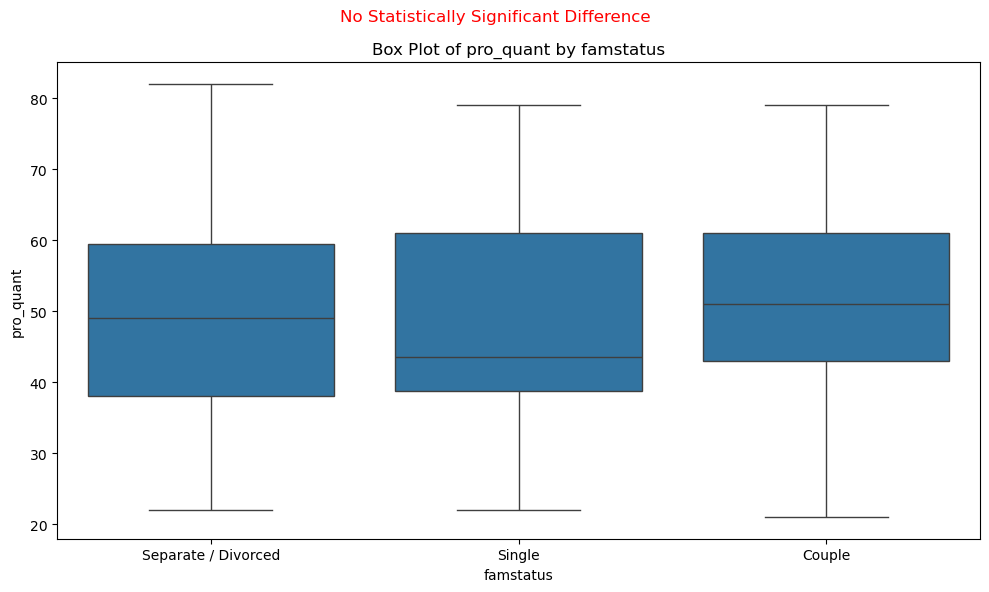

-----------------------------------------------------

Analysis for pro_quant vs pro_cat:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups   1454.0854    2  727.0427  4.1322   0.0172
Within Groups   43106.7533  245  175.9459     NaN      NaN
Total           44560.8387  247       NaN     NaN      NaN

The difference between groups is statistically significant (p=0.0172).


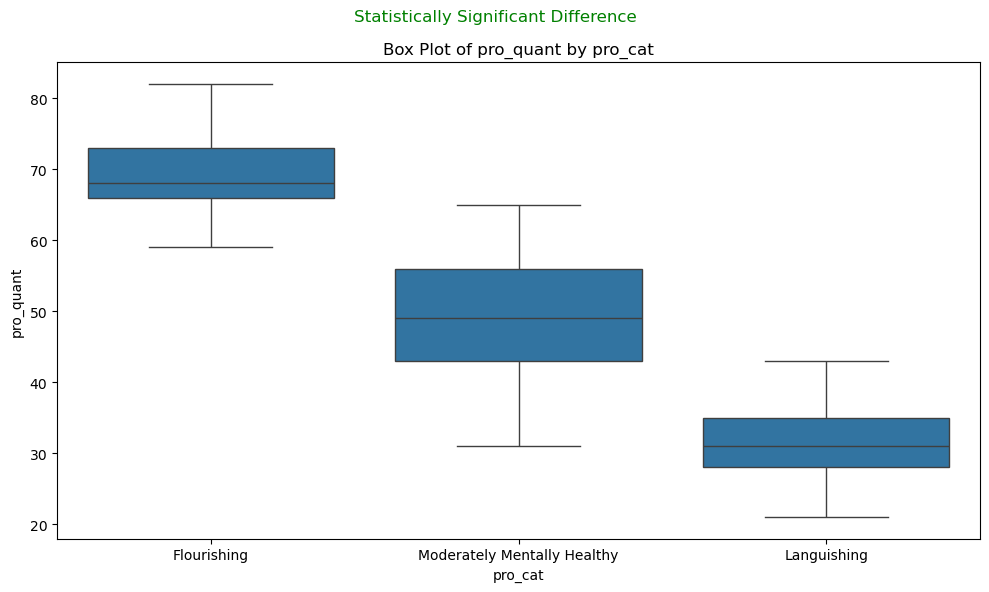

-----------------------------------------------------

Analysis for pro_quant vs priv_cat:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups    572.9527    2  286.4764  1.5956   0.2049
Within Groups   43987.8860  245  179.5424     NaN      NaN
Total           44560.8387  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.2049).


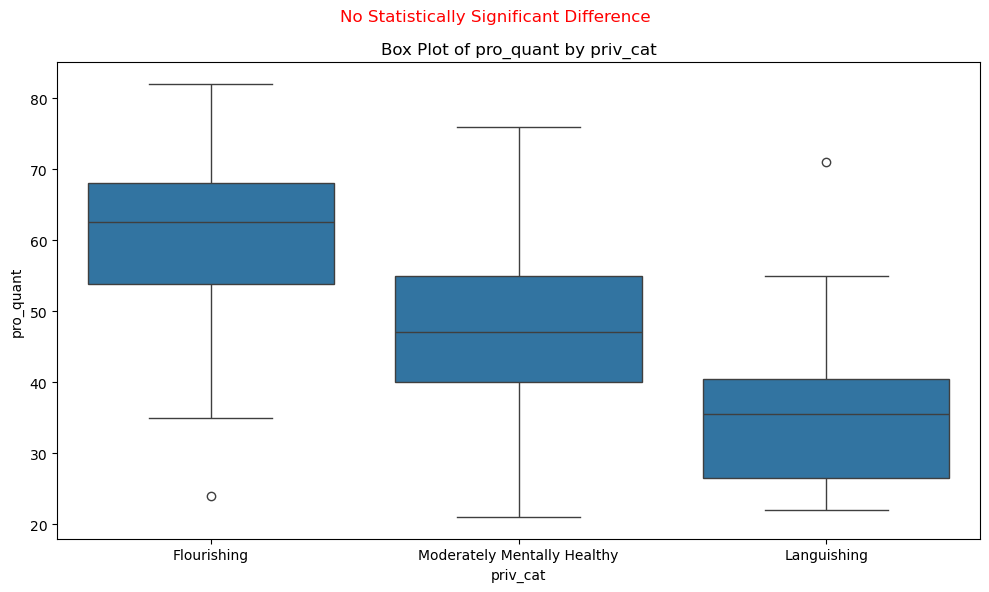

-----------------------------------------------------

Analysis for pro_quant vs pos_cat:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups    951.6589    3  317.2196  1.7749   0.1525
Within Groups   43609.1798  244  178.7261     NaN      NaN
Total           44560.8387  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.1525).


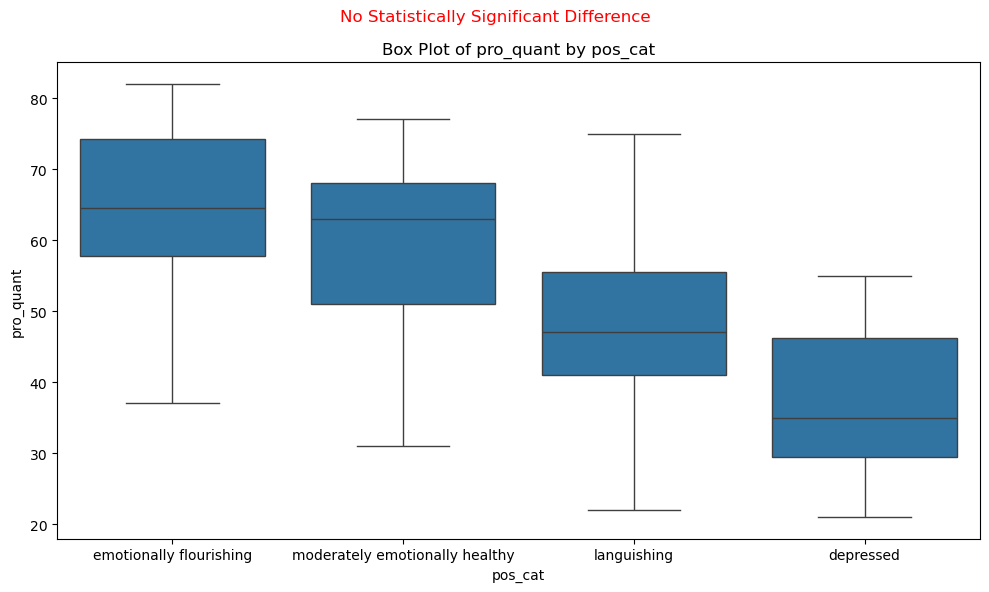

-----------------------------------------------------

Analysis for priv_quant vs education:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups     78.7166    5   15.7433  0.1146   0.9891
Within Groups   33234.2471  242  137.3316     NaN      NaN
Total           33312.9637  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9891).


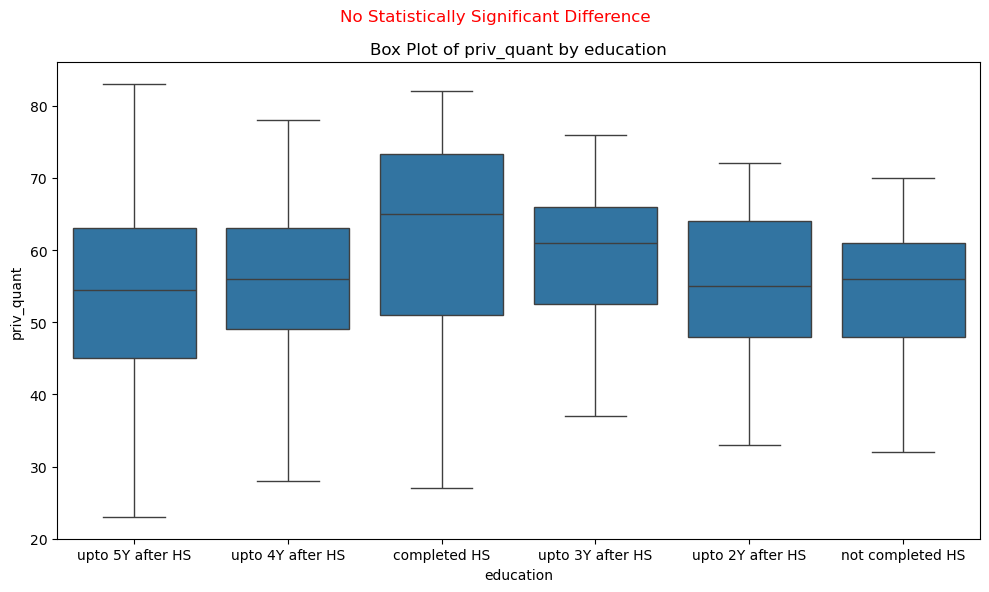

-----------------------------------------------------

Analysis for priv_quant vs sex:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups      0.0375    1    0.0375  0.0003   0.9867
Within Groups   33312.9262  246  135.4184     NaN      NaN
Total           33312.9637  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9867).


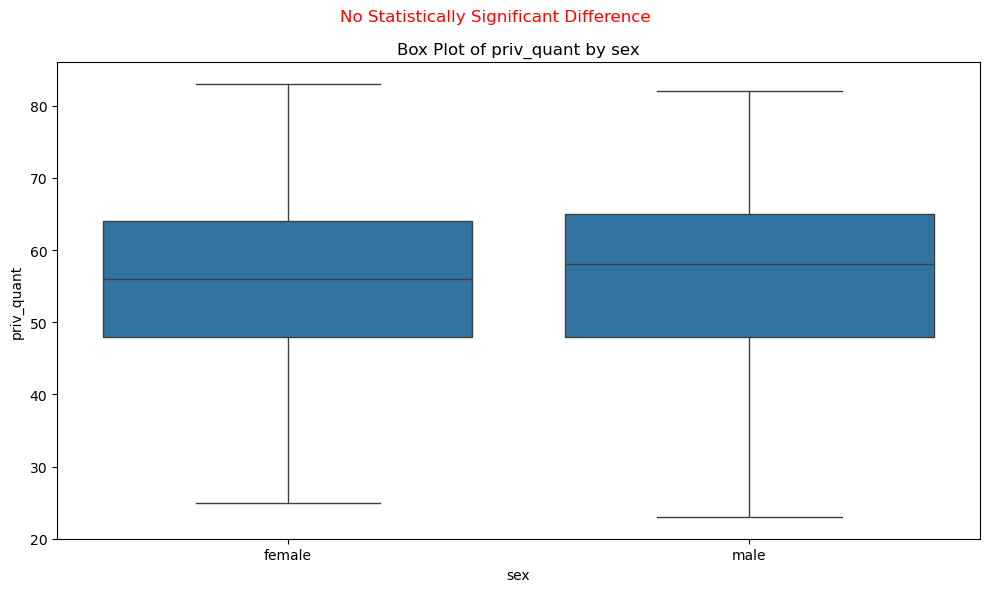

-----------------------------------------------------

Analysis for priv_quant vs famstatus:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups     41.0349    2   20.5174  0.1511   0.8599
Within Groups   33271.9289  245  135.8038     NaN      NaN
Total           33312.9637  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.8599).


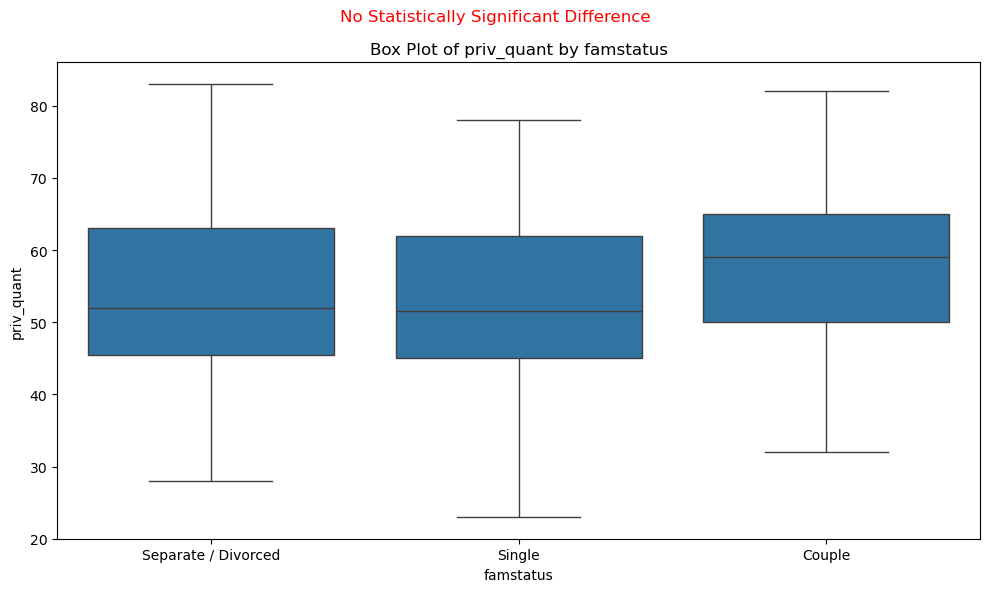

-----------------------------------------------------

Analysis for priv_quant vs pro_cat:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups    462.3373    2  231.1687  1.7241   0.1805
Within Groups   32850.6264  245  134.0842     NaN      NaN
Total           33312.9637  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.1805).


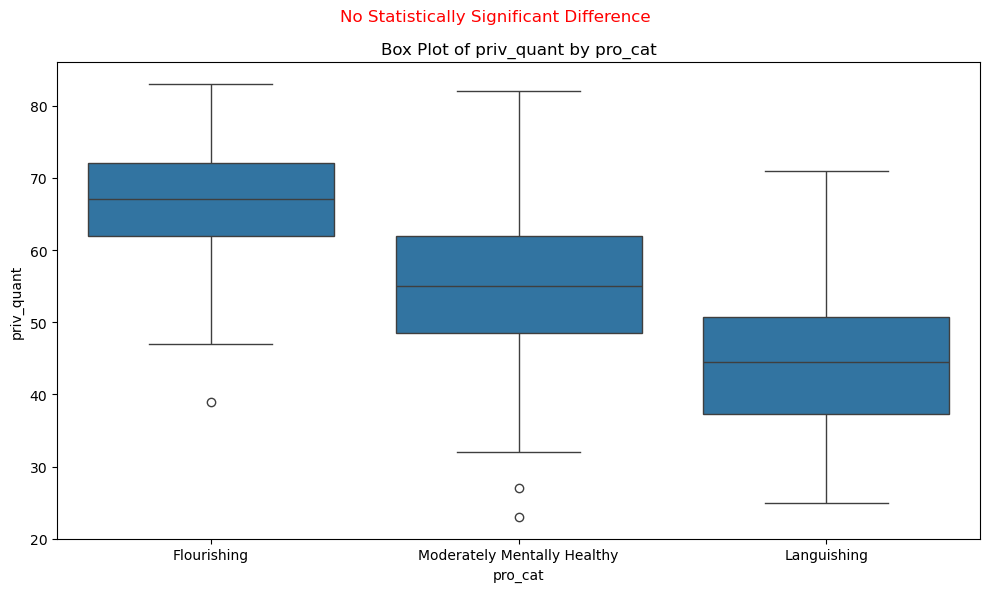

-----------------------------------------------------

Analysis for priv_quant vs priv_cat:

ANOVA Table:
                        SS   df        MS      F  p-value
Source                                                   
Between Groups   1430.1725    2  715.0862  5.495   0.0046
Within Groups   31882.7912  245  130.1338    NaN      NaN
Total           33312.9637  247       NaN    NaN      NaN

The difference between groups is statistically significant (p=0.0046).


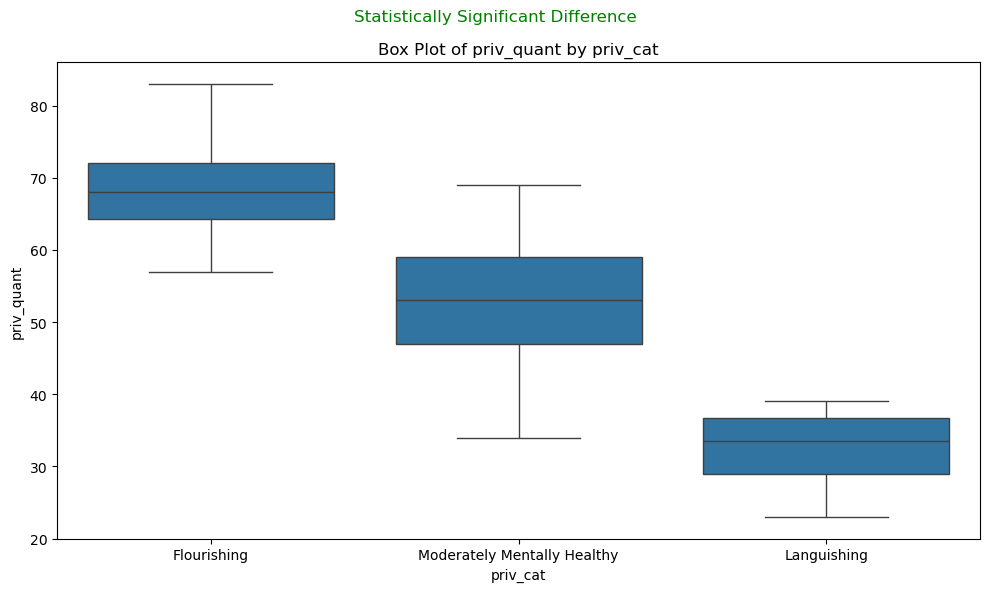

-----------------------------------------------------

Analysis for priv_quant vs pos_cat:

ANOVA Table:
                        SS   df        MS       F  p-value
Source                                                    
Between Groups    770.0106    3  256.6702  1.9245   0.1262
Within Groups   32542.9531  244  133.3728     NaN      NaN
Total           33312.9637  247       NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.1262).


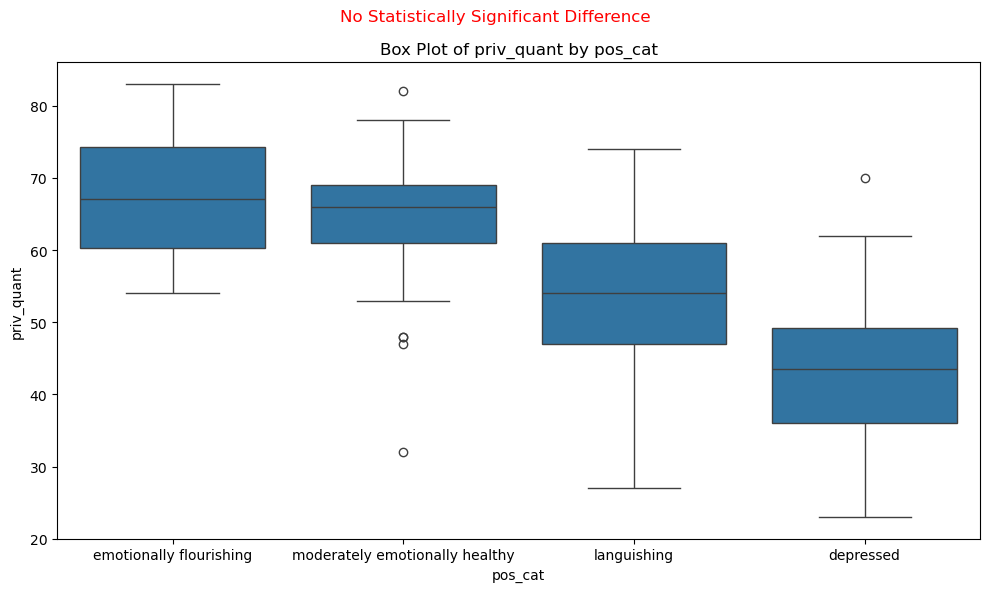

-----------------------------------------------------

Analysis for flow vs education:

ANOVA Table:
                        SS   df       MS       F  p-value
Source                                                   
Between Groups     40.6246    5   8.1249  0.1835   0.9687
Within Groups   10716.7947  242  44.2843     NaN      NaN
Total           10757.4194  247      NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9687).


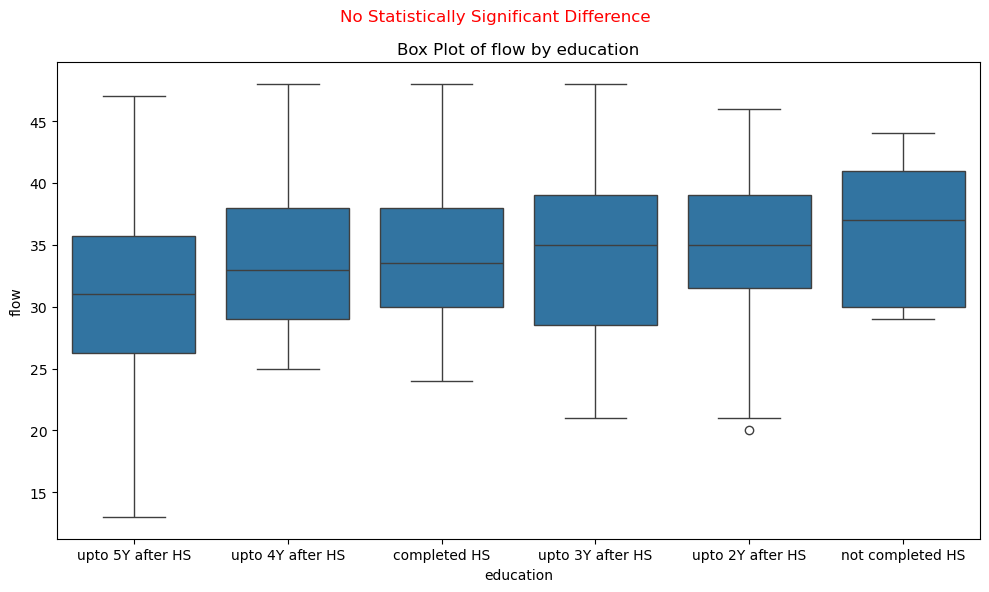

-----------------------------------------------------

Analysis for flow vs sex:

ANOVA Table:
                        SS   df       MS       F  p-value
Source                                                   
Between Groups      0.3743    1   0.3743  0.0086   0.9264
Within Groups   10757.0450  246  43.7278     NaN      NaN
Total           10757.4194  247      NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9264).


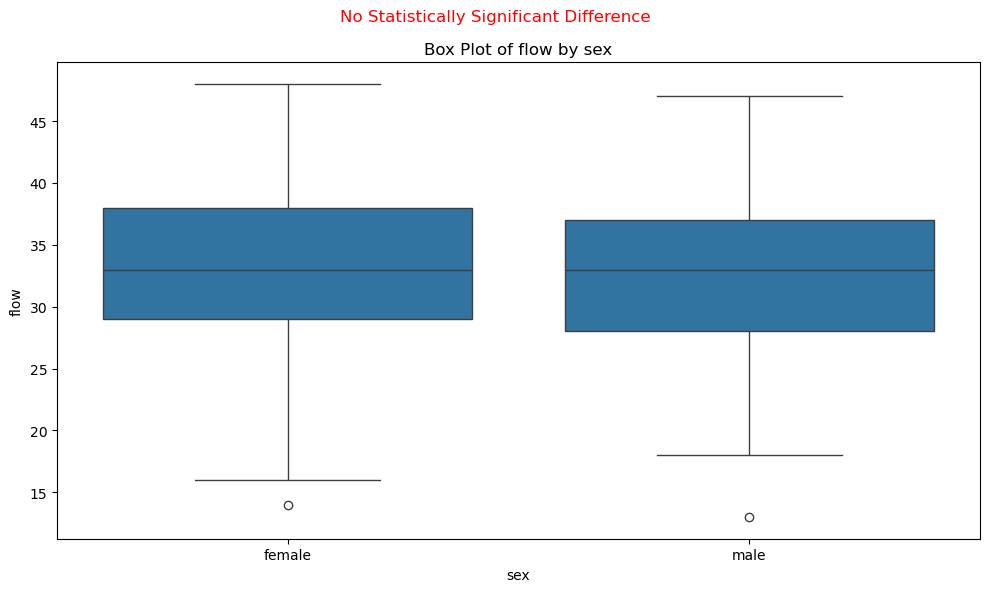

-----------------------------------------------------

Analysis for flow vs famstatus:

ANOVA Table:
                        SS   df       MS       F  p-value
Source                                                   
Between Groups      6.5872    2   3.2936  0.0751   0.9277
Within Groups   10750.8321  245  43.8809     NaN      NaN
Total           10757.4194  247      NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.9277).


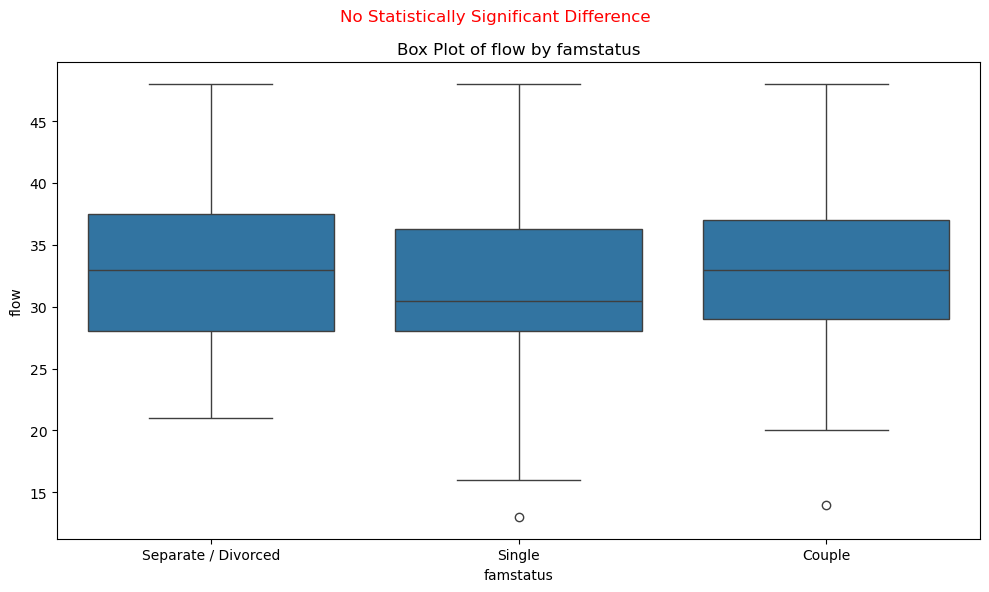

-----------------------------------------------------

Analysis for flow vs pro_cat:

ANOVA Table:
                        SS   df       MS       F  p-value
Source                                                   
Between Groups     84.0183    2  42.0092  0.9643   0.3827
Within Groups   10673.4010  245  43.5649     NaN      NaN
Total           10757.4194  247      NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.3827).


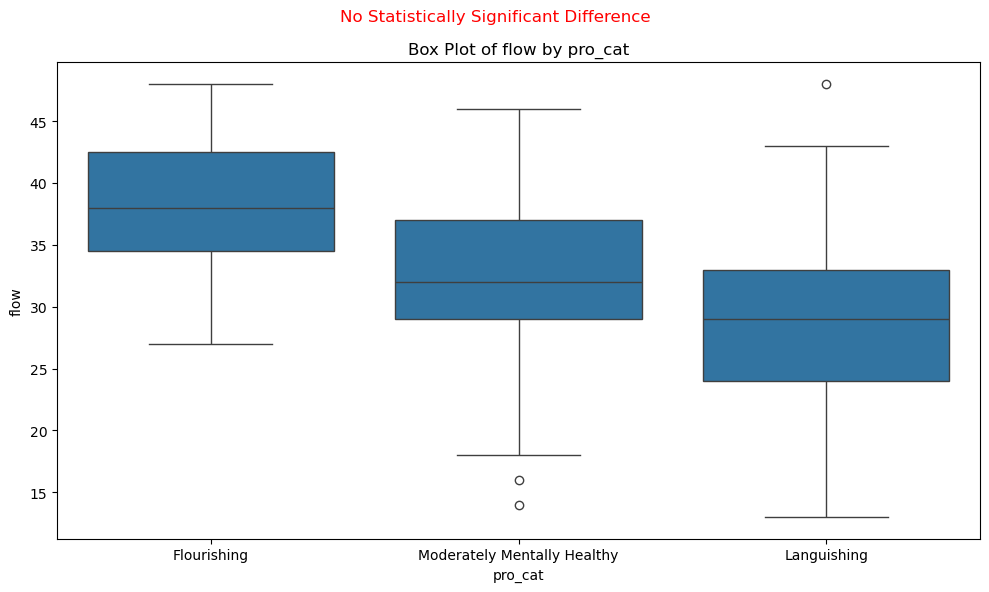

-----------------------------------------------------

Analysis for flow vs priv_cat:

ANOVA Table:
                        SS   df       MS       F  p-value
Source                                                   
Between Groups     87.7239    2  43.8619  1.0072   0.3668
Within Groups   10669.6955  245  43.5498     NaN      NaN
Total           10757.4194  247      NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.3668).


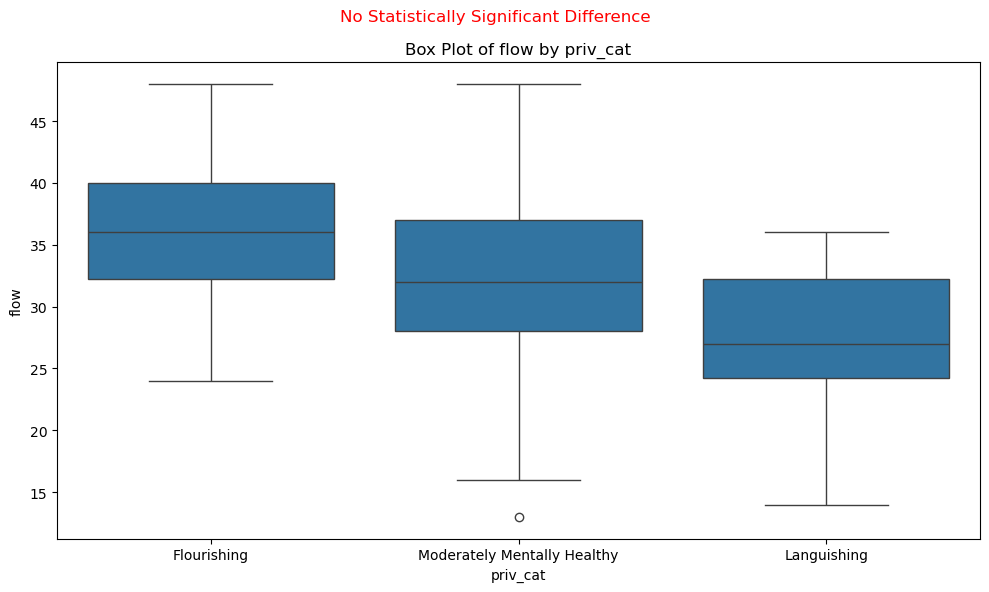

-----------------------------------------------------

Analysis for flow vs pos_cat:

ANOVA Table:
                        SS   df       MS       F  p-value
Source                                                   
Between Groups    141.2603    3  47.0868  1.0822   0.3572
Within Groups   10616.1591  244  43.5088     NaN      NaN
Total           10757.4194  247      NaN     NaN      NaN

The difference between groups is not statistically significant (p=0.3572).


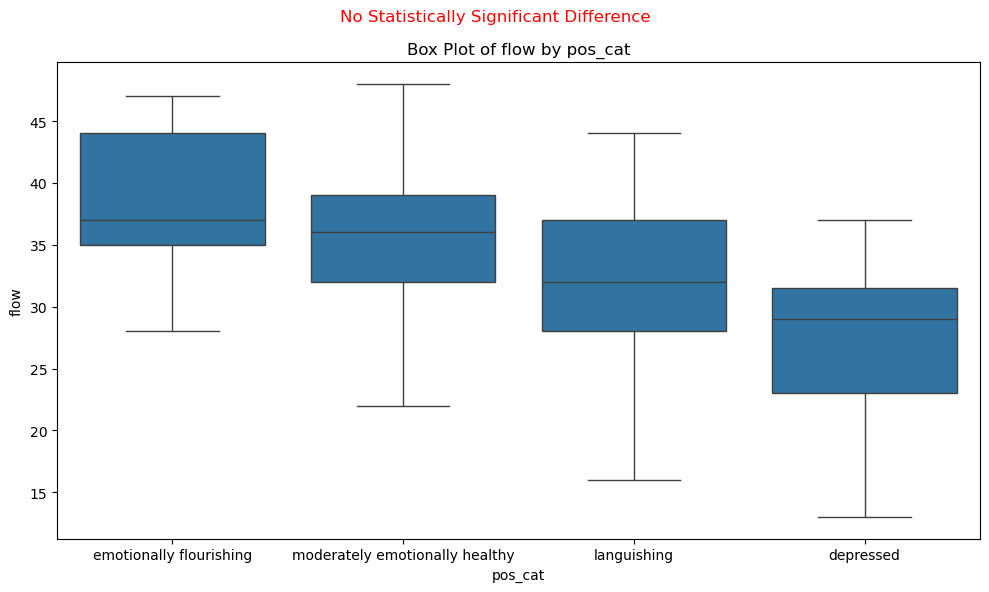

-----------------------------------------------------


In [34]:
significant, nonsignificant = anova_and_boxplot(df, numerical_cols, categorical_cols)


In [31]:
significant

[('pro_quant', 'pro_cat'), ('priv_quant', 'priv_cat')]

In [32]:
nonsignificant

[('age', 'education'),
 ('age', 'sex'),
 ('age', 'famstatus'),
 ('age', 'pro_cat'),
 ('age', 'priv_cat'),
 ('age', 'pos_cat'),
 ('pro_quant', 'education'),
 ('pro_quant', 'sex'),
 ('pro_quant', 'famstatus'),
 ('pro_quant', 'priv_cat'),
 ('pro_quant', 'pos_cat'),
 ('priv_quant', 'education'),
 ('priv_quant', 'sex'),
 ('priv_quant', 'famstatus'),
 ('priv_quant', 'pro_cat'),
 ('priv_quant', 'pos_cat'),
 ('flow', 'education'),
 ('flow', 'sex'),
 ('flow', 'famstatus'),
 ('flow', 'pro_cat'),
 ('flow', 'priv_cat'),
 ('flow', 'pos_cat')]